PART A: Outlier Treatment


PART A: Missing Value Treatment


PART A: Univariate (4) & Bivariate (6) analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)


PART A: Train Test Split


PART A: Build Logistic Regression Model (using statsmodels library) on most important variables on train dataset and choose the optimum cut-off. Also showcase your model building approach


PART A: Validate the Model on Test Dataset and state the performance metrics. Also state interpretation from the model


PART A: Build a Random Forest Model on Train Dataset. Also showcase your model building approach


PART A: Validate the Random Forest Model on test Dataset and state the performance metrics. Also state interpretation from the model


PART A: Build a LDA Model on Train Dataset. Also showcase your model building approach


PART A: Validate the LDA Model on test Dataset and state the performance metrics. Also state interpretation from the model


PART A: Compare the performances of Logistic Regression, Random Forest, and LDA models (include ROC curve)


PART A: Conclusions and Recommendations


In [380]:
#1. Basic info of the dataset and outlier treatment

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

pd.set_option('display.max_columns',None)

In [382]:
company_df = pd.read_excel('CompData-1.xlsx')

In [383]:
company_df.shape

(2058, 58)

In [384]:
company_df.head().T

0  \
Co_Code                                                   16974   
Co_Name                                             Hind.Cables   
_Operating_Expense_Rate                            8820000000.0   
_Research_and_development_expense_rate                      0.0   
_Cash_flow_rate                                        0.462045   
_Interest_bearing_debt_interest_rate                   0.000352   
_Tax_rate_A                                            0.001417   
_Cash_Flow_Per_Share                                   0.322558   
_Per_Share_Net_profit_before_tax_Yuan_                 0.194472   
_Realized_Sales_Gross_Profit_Growth_Rate               0.022074   
_Operating_Profit_Growth_Rate                          0.848021   
_Continuous_Net_Profit_Growth_Rate                      0.21759   
_Total_Asset_Growth_Rate                           7500000000.0   
_Net_Value_Growth_Rate                                 0.000441   
_Total_Asset_Return_Growth_Rate_Ratio                  0.263902   
_Cash_Reinvestment_perc                                0.369137   
_Current_Ratio                                         0.008324   
_Quick_Ratio                                           0.000255   
_Interest_Expense_Ratio                                0.631513   
_Total_debt_to_Total_net_worth                         0.026006   
_Long_term_fund_suitability_ratio_A                    0.005767   
_Net_profit_before_tax_to_Paid_in_capital              0.192859   
_Total_Asset_Turnover                                  0.053973   
_Accounts_Receivable_Turnover                          0.014004   
_Average_Collection_Days                               0.000452   
_Inventory_Turnover_Rate_times                      707000000.0   
_Fixed_Assets_Turnover_Frequency                       0.000305   
_Net_Worth_Turnover_Rate_times                         0.029839   
_Operating_profit_per_person                           0.611689   
_Allocation_rate_per_person                            0.139494   
_Quick_Assets_to_Total_Assets                          0.176438   
_Cash_to_Total_Assets                                  0.025626   
_Quick_Assets_to_Current_Liability                     0.001509   
_Cash_to_Current_Liability                             0.000676   
_Operating_Funds_to_Liability                          0.342391   
_Inventory_to_Working_Capital                          0.278434   
_Inventory_to_Current_Liability                        0.017945   
_Long_term_Liability_to_Current_Assets                 0.003064   
_Retained_Earnings_to_Total_Assets                      0.93763   
_Total_income_to_Total_expense                         0.002687   
_Total_expense_to_Assets                               0.007059   
_Current_Asset_Turnover_Rate                           0.000732   
_Quick_Asset_Turnover_Rate                             0.000142   
_Cash_Turnover_Rate                                5470000000.0   
_Fixed_Assets_to_Assets                                 0.09427   
_Cash_Flow_to_Total_Assets                             0.632666   
_Cash_Flow_to_Liability                                0.458073   
_CFO_to_Assets                                         0.576869   
_Cash_Flow_to_Equity                                   0.310901   
_Current_Liability_to_Current_Assets                   0.034913   
_Liability_Assets_Flag                                        0   
_Total_assets_to_GNP_price                             0.028801   
_No_credit_Interval                                    0.620927   
_Degree_of_Financial_Leverage_DFL                       0.02693   
_Interest_Coverage_Ratio_Interest_expense_to_EBIT      0.565744   
_Net_Income_Flag                                              1   
_Equity_to_Liability                                   0.015338   
Default                                                       0   

                                                                 1  \
Co_Code                               

In [385]:
company_df.tail().T

2053  \
Co_Code                                                        2743   
Co_Name                                            Kothari Ferment.   
_Operating_Expense_Rate                                    0.000302   
_Research_and_development_expense_rate                 6490000000.0   
_Cash_flow_rate                                            0.477066   
_Interest_bearing_debt_interest_rate                            0.0   
_Tax_rate_A                                                0.183014   
_Cash_Flow_Per_Share                                       0.322063   
_Per_Share_Net_profit_before_tax_Yuan_                     0.192739   
_Realized_Sales_Gross_Profit_Growth_Rate                   0.022127   
_Operating_Profit_Growth_Rate                               0.84802   
_Continuous_Net_Profit_Growth_Rate                         0.217591   
_Total_Asset_Growth_Rate                               7200000000.0   
_Net_Value_Growth_Rate                                     0.000469   
_Total_Asset_Return_Growth_Rate_Ratio                      0.264462   
_Cash_Reinvestment_perc                                     0.37751   
_Current_Ratio                                             0.063886   
_Quick_Ratio                                               0.057269   
_Interest_Expense_Ratio                                    0.630612   
_Total_debt_to_Total_net_worth                             0.000692   
_Long_term_fund_suitability_ratio_A                        0.006091   
_Net_profit_before_tax_to_Paid_in_capital                  0.191811   
_Total_Asset_Turnover                                       0.07946   
_Accounts_Receivable_Turnover                              0.000808   
_Average_Collection_Days                                   0.007836   
_Inventory_Turnover_Rate_times                         8040000000.0   
_Fixed_Assets_Turnover_Frequency                           0.000199   
_Net_Worth_Turnover_Rate_times                             0.018226   
_Operating_profit_per_person                               0.397899   
_Allocation_rate_per_person                                0.008839   
_Quick_Assets_to_Total_Assets                              0.751271   
_Cash_to_Total_Assets                                      0.380923   
_Quick_Assets_to_Current_Liability                         0.058189   
_Cash_to_Current_Liability                                 0.084897   
_Operating_Funds_to_Liability                              0.384342   
_Inventory_to_Working_Capital                              0.277025   
_Inventory_to_Current_Liability                            0.015041   
_Long_term_Liability_to_Current_Assets                          0.0   
_Retained_Earnings_to_Total_Assets                         0.958918   
_Total_income_to_Total_expense                             0.002525   
_Total_expense_to_Assets                                   0.026074   
_Current_Asset_Turnover_Rate                               0.000422   
_Quick_Asset_Turnover_Rate                                 0.000407   
_Cash_Turnover_Rate                                        0.000541   
_Fixed_Assets_to_Assets                                    0.191522   
_Cash_Flow_to_Total_Assets                                 0.700703   
_Cash_Flow_to_Liability                                    0.519602   
_CFO_to_Assets                                             0.599051   
_Cash_Flow_to_Equity                                       0.320387   
_Current_Liability_to_Current_Assets                        0.00443   
_Liability_Assets_Flag                                            0   
_Total_assets_to_GNP_price                                  0.00042   
_No_credit_Interval                                        0.624567   
_Degree_of_Financial_Leverage_DFL                          0.026791   
_Interest_Coverage_Ratio_Interest_expense_to_EBIT          0.565158   
_Net_Income_Flag                                                  1   
_Equity_to_Liabi

In [386]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [387]:
company_df.duplicated().sum()

0

In [388]:
#check for column name inconsistencies and type inconsistencies
#no column name and type inconsistencies

In [389]:
#Below are the columns with null values which need to be treated.
company_df.isnull().sum()[company_df.isnull().sum()>0]

_Cash_Flow_Per_Share                    167
_Total_debt_to_Total_net_worth           21
_Cash_to_Total_Assets                    96
_Current_Liability_to_Current_Assets     14
dtype: int64

In [390]:
company_df_related = company_df.drop(['Co_Code', 'Co_Name', 'Default'], axis = 1)

In [391]:
#Imputing missing values using KNN imputer

In [392]:
from sklearn.impute import KNNImputer
KNN_Imputer = KNNImputer(n_neighbors=5)

In [393]:
company_df_new = pd.DataFrame(KNN_Imputer.fit_transform(company_df_related), columns = company_df_related.columns)

In [394]:
company_df_new.isnull().sum().sum()

0

In [395]:
company_df = pd.concat([company_df_new, company_df[['Co_Code', 'Co_Name', 'Default']]], axis=1)

In [396]:
company_df.shape

(2058, 58)

In [397]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   _Operating_Expense_Rate                            2058 non-null   float64
 1   _Research_and_development_expense_rate             2058 non-null   float64
 2   _Cash_flow_rate                                    2058 non-null   float64
 3   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 4   _Tax_rate_A                                        2058 non-null   float64
 5   _Cash_Flow_Per_Share                               2058 non-null   float64
 6   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 7   _Realized_Sales_Gross_Profit_Growth_Rate           2058 non-null   float64
 8   _Operating_Profit_Growth_Rate                      2058 non-null   float64
 9   _Continu

In [398]:
company_df.isnull().sum().sum()

0

In [399]:
#2. Outlier treatment

In [400]:
#split the dataset into training and test columns (for outlier treatment)

#drop Co_Code,Co_Name as they won't be helpful in model building
company_df.drop(['Co_Code', 'Co_Name'], axis = 1, inplace = True)
Company_X = company_df.drop('Default', axis = 1)
Company_Y = company_df['Default']

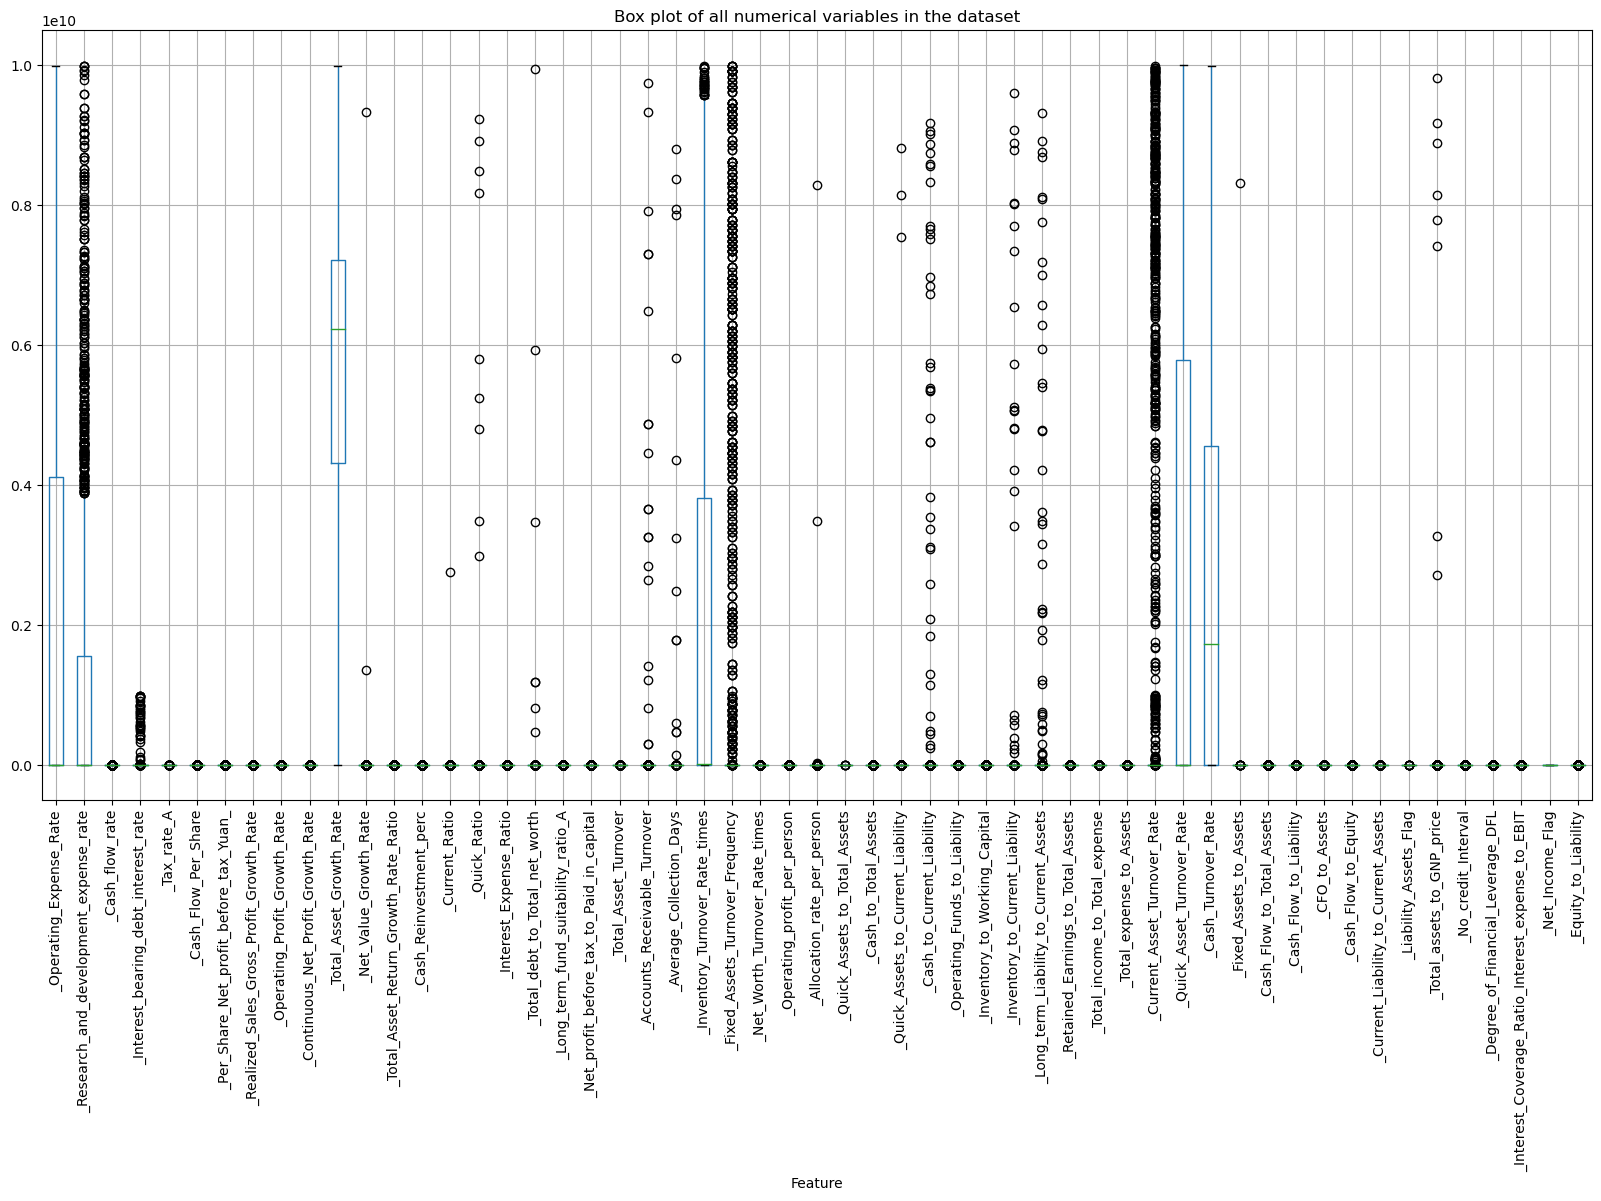

In [401]:
plt.figure(figsize = (20,10))
plt.title('Box plot of all numerical variables in the dataset')
plt.xlabel('Feature')
Company_X.boxplot(rot=90);

In [402]:
company_df['Default'].value_counts()

0    1838
1     220
Name: Default, dtype: int64

In [403]:
Company_numeric = Company_X.drop(['_Liability_Assets_Flag', '_Net_Income_Flag'], axis = 1)

In [404]:
Q1 = Company_numeric.quantile(0.25)
Q3 = Company_numeric.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [405]:
#determining the number of outliers in each column.
((Company_numeric > UL) | (Company_numeric < LL)).sum()[((Company_numeric > UL) | (Company_numeric < LL)).sum() > 0].sum()

10891

In [406]:
#There are total of 50 rows having outliers we need to treat the outliers.

In [407]:
#Handling outliers using robust scaling
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

# calculate median and IQR  
robust_scaled_data = robust_scaler.fit_transform(Company_numeric)

In [408]:
scaled_array = np.round(robust_scaled_data,3).reshape(Company_numeric.shape[0], Company_numeric.shape[1])

In [409]:
Company_NumScaled = pd.DataFrame(scaled_array, columns = Company_numeric.columns)

In [410]:
Company_NumScaled.head()

_Operating_Expense_Rate  _Research_and_development_expense_rate  \
0                    2.146                                  -0.000   
1                    2.282                                   2.729   
2                    0.925                                   0.526   
3                    1.567                                  -0.000   
4                    0.895                                  -0.000   

   _Cash_flow_rate  _Interest_bearing_debt_interest_rate  _Tax_rate_A  \
0           -0.176                                -0.264       -0.165   
1           -0.418                                 0.677       -0.172   
2           -1.700                                 0.109       -0.172   
3           -0.090                                 0.357       -0.129   
4           -0.041                                 0.848        1.680   

   _Cash_Flow_Per_Share  _Per_Share_Net_profit_before_tax_Yuan_  \
0                 0.174                                   0.977   
1                -0.504                                  -0.727   
2                -2.014                                  -0.160   
3                -0.089                                  -0.047   
4                 0.419                                   0.047   

   _Realized_Sales_Gross_Profit_Growth_Rate  _Operating_Profit_Growth_Rate  \
0                                    -0.276                         -0.125   
1                                    -2.113                        -59.619   
2                                     0.923                          1.121   
3                                    59.110                          2.503   
4                                    -0.298                         -0.368   

   _Continuous_Net_Profit_Growth_Rate  _Total_Asset_Growth_Rate  \
0                              -0.125                     0.439   
1                              -5.172                     0.181   
2                              -0.503                     1.189   
3                               1.452                     0.446   
4                              -0.153                     0.308   

   _Net_Value_Growth_Rate  _Total_Asset_Return_Growth_Rate_Ratio  \
0                  -0.273                                 -0.200   
1                  -1.001                                 -0.529   
2                  -0.074                                  0.137   
3                  -0.139                                  1.312   
4                  -0.018                                 -0.087   

   _Cash_Reinvestment_perc  _Current_Ratio  _Quick_Ratio  \
0                   -0.663          -0.089        -0.844   
1                   -0.424          -0.289        -0.083   
2                   -2.030          -0.040         0.105   
3                    0.061           1.269        -0.595   
4                    0.718          -0.075        -0.221   

   _Interest_Expense_Ratio  _Total_debt_to_Total_net_worth  \
0                    0.630                           2.054   
1                   -2.424                          -0.050   
2                    0.784                          -0.347   
3                    1.579                           0.063   
4                    1.663                           0.701   

   _Long_term_fund_suitability_ratio_A  \
0                                0.199   
1                               -0.229   
2                               -0.302   
3                                5.141   
4                                0.243   

   _Net_profit_before_tax_to_Paid_in_capital  _Total_Asset_Turnover  \
0                                      0.984                 -0.465   
1                                     -0.747                 -0.437   
2                                     -0.163                  0.479   
3                                     -0.130                 -0.014   
4                                      0.055                  0.563   

   _Accounts_Receivable_Turnover  _Average_Co

In [411]:
Company_NumScaled.describe().T

count          mean  \
_Operating_Expense_Rate                            2058.0  4.993586e-01   
_Research_and_development_expense_rate             2058.0  7.797653e-01   
_Cash_flow_rate                                    2058.0  2.255476e-01   
_Interest_bearing_debt_interest_rate               2058.0  2.875744e+10   
_Tax_rate_A                                        2058.0  3.591220e-01   
_Cash_Flow_Per_Share                               2058.0 -7.025948e-02   
_Per_Share_Net_profit_before_tax_Yuan_             2058.0  6.873081e-02   
_Realized_Sales_Gross_Profit_Growth_Rate           2058.0  7.057287e+00   
_Operating_Profit_Growth_Rate                      2058.0  4.946526e-01   
_Continuous_Net_Profit_Growth_Rate                 2058.0 -4.478038e+00   
_Total_Asset_Growth_Rate                           2058.0 -3.226866e-01   
_Net_Value_Growth_Rate                             2058.0  9.962095e+10   
_Total_Asset_Return_Growth_Rate_Ratio              2058.0  1.474266e-01   
_Cash_Reinvestment_perc                            2058.0 -1.194227e-01   
_Current_Ratio                                     2058.0  1.925887e+08   
_Quick_Ratio                                       2058.0  4.659567e+09   
_Interest_Expense_Ratio                            2058.0  4.340675e-01   
_Total_debt_to_Total_net_worth                     2058.0  1.225726e+09   
_Long_term_fund_suitability_ratio_A                2058.0  2.757825e+00   
_Net_profit_before_tax_to_Paid_in_capital          2058.0  4.472546e-02   
_Total_Asset_Turnover                              2058.0  2.366628e-01   
_Accounts_Receivable_Turnover                      2058.0  3.748176e+10   
_Average_Collection_Days                           2058.0  5.194524e+09   
_Inventory_Turnover_Rate_times                     2058.0  5.271467e-01   
_Fixed_Assets_Turnover_Frequency                   2058.0  1.501951e+11   
_Net_Worth_Turnover_Rate_times                     2058.0  4.552575e-01   
_Operating_profit_per_person                       2058.0  9.037362e-01   
_Allocation_rate_per_person                        2058.0  2.876689e+08   
_Quick_Assets_to_Total_Assets                      2058.0  1.159461e-01   
_Cash_to_Total_Assets                              2058.0  4.402770e-01   
_Quick_Assets_to_Current_Liability                 2058.0  1.986700e+09   
_Cash_to_Current_Liability                         2058.0  1.438021e+10   
_Operating_Funds_to_Liability                      2058.0  1.951822e-01   
_Inventory_to_Working_Capital                      2058.0  7.095228e-01   
_Inventory_to_Current_Liability                    2058.0  5.868319e+09   
_Long_term_Liability_to_Current_Assets             2058.0  6.992683e+09   
_Retained_Earnings_to_Total_Assets                 2058.0 -3.617595e-01   
_Total_income_to_Total_expense                     2058.0  2.458649e-01   
_Total_expense_to_Assets                           2058.0  4.526725e-01   
_Current_Asset_Turnover_Rate                       2058.0  1.143478e+12   
_Quick_Asset_Turnover_Rate                         2058.0  4.441696e-01   
_Cash_Turnover_Rate                                2058.0  2.030763e-01   
_Fixed_Assets_to_Assets                            2058.0  1.269221e+07   
_Cash_Flow_to_Total_Assets                         2058.0  4.743149e-02   
_Cash_Flow_to_Liability                            2058.0  1.486778e-01   
_CFO_to_Assets                                     2058.0 -4.534257e-02   
_Cash_Flow_to_Equity                               2058.0 -3.485909e-03   
_Current_Liability_to_Current_Assets               2058.0  3.012818e-01   
_Total_assets_to_GNP_price                         2058.0  4.562340e+09   
_No_credit_Interval                                2058.0 -8.907289e-02   
_Degree_of_Financial_Leverage_DFL                  2058.0  4.088203e+00   
_Interest_Coverage_Ratio_Interest_expense_to_EBIT  2058.0  1.122279e-01   
_Equity_to_Liability                               2058.0  6.110243e-01   

 

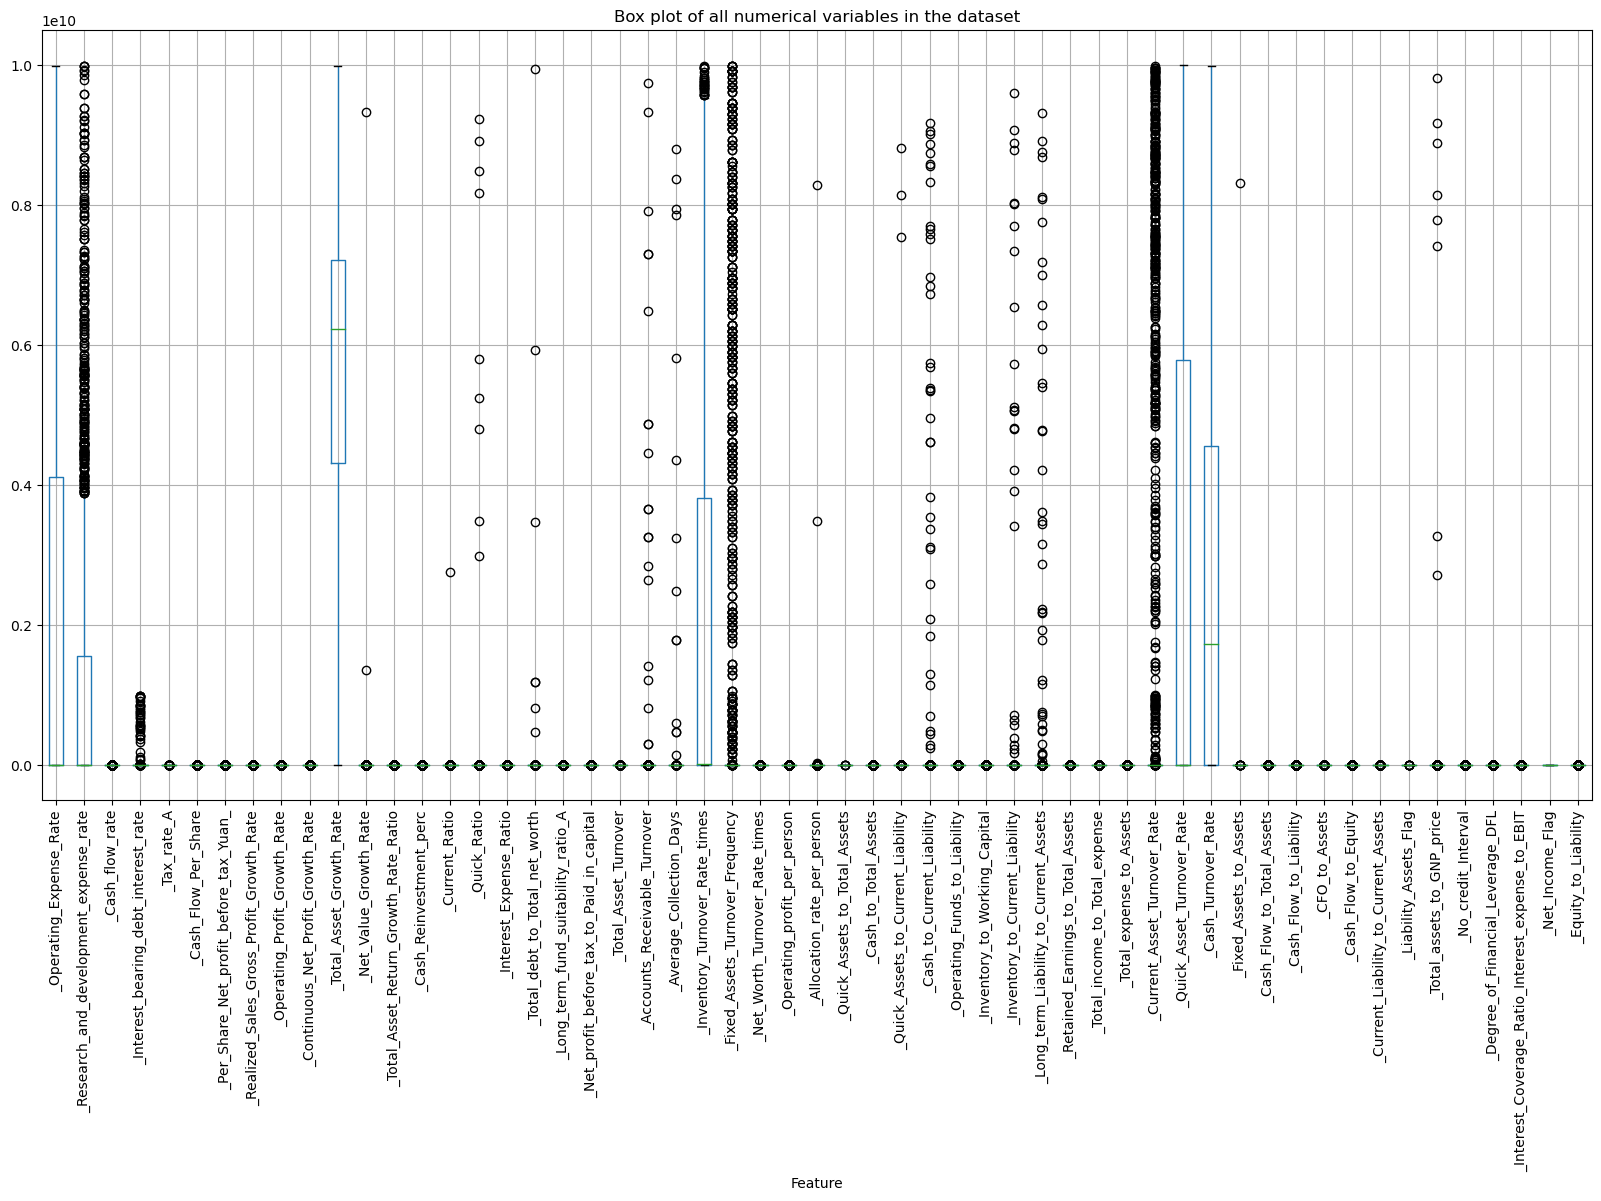

In [412]:
plt.figure(figsize = (20,10))
plt.title('Box plot of all numerical variables in the dataset')
plt.xlabel('Feature')
Company_X.boxplot(rot=90);

In [413]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [414]:
for column in Company_NumScaled.columns:
    lr,ur=remove_outlier(Company_NumScaled[column])
    Company_NumScaled[column]=np.where(Company_NumScaled[column]>ur,ur,Company_NumScaled[column])
    Company_NumScaled[column]=np.where(Company_NumScaled[column]<lr,lr,Company_NumScaled[column])

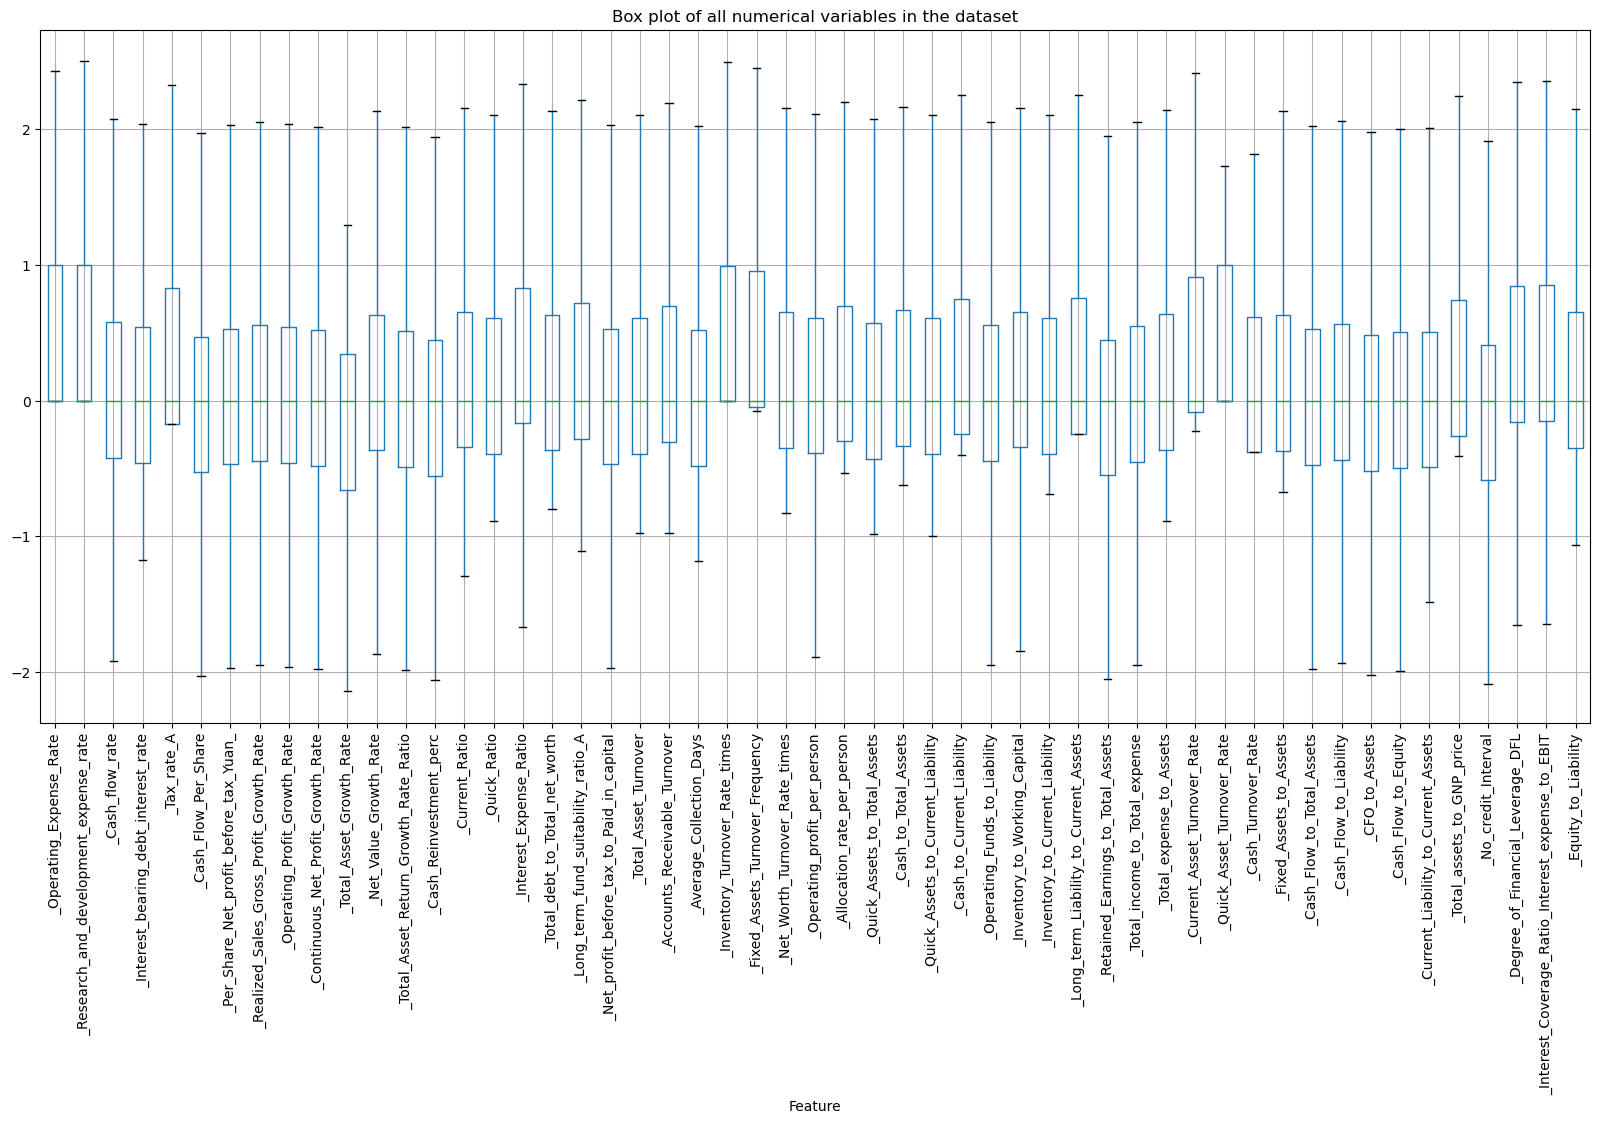

In [415]:
plt.figure(figsize = (20,9))
plt.title('Box plot of all numerical variables in the dataset')
plt.xlabel('Feature')
Company_NumScaled.boxplot(rot=90);

In [416]:
Q1 = Company_NumScaled.quantile(0.25)
Q3 = Company_NumScaled.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [417]:
#determining the number of outliers in each column.
((Company_NumScaled > UL) | (Company_NumScaled < LL)).sum()[((Company_NumScaled > UL) | (Company_NumScaled < LL)).sum() > 0]

Series([], dtype: int64)

In [418]:
company_df_scaled = pd.concat([Company_NumScaled, company_df[['Default','_Liability_Assets_Flag', '_Net_Income_Flag']]], axis=1)

In [419]:
#univariate and bivariate analysis

#histograms of all numerical variables including target variable
#scatter plots of all numerical variables with target variable

In [420]:
feature_list_numeric = list(Company_NumScaled.columns)
feature_list_numeric

['_Operating_Expense_Rate',
 '_Research_and_development_expense_rate',
 '_Cash_flow_rate',
 '_Interest_bearing_debt_interest_rate',
 '_Tax_rate_A',
 '_Cash_Flow_Per_Share',
 '_Per_Share_Net_profit_before_tax_Yuan_',
 '_Realized_Sales_Gross_Profit_Growth_Rate',
 '_Operating_Profit_Growth_Rate',
 '_Continuous_Net_Profit_Growth_Rate',
 '_Total_Asset_Growth_Rate',
 '_Net_Value_Growth_Rate',
 '_Total_Asset_Return_Growth_Rate_Ratio',
 '_Cash_Reinvestment_perc',
 '_Current_Ratio',
 '_Quick_Ratio',
 '_Interest_Expense_Ratio',
 '_Total_debt_to_Total_net_worth',
 '_Long_term_fund_suitability_ratio_A',
 '_Net_profit_before_tax_to_Paid_in_capital',
 '_Total_Asset_Turnover',
 '_Accounts_Receivable_Turnover',
 '_Average_Collection_Days',
 '_Inventory_Turnover_Rate_times',
 '_Fixed_Assets_Turnover_Frequency',
 '_Net_Worth_Turnover_Rate_times',
 '_Operating_profit_per_person',
 '_Allocation_rate_per_person',
 '_Quick_Assets_to_Total_Assets',
 '_Cash_to_Total_Assets',
 '_Quick_Assets_to_Current_Liabili

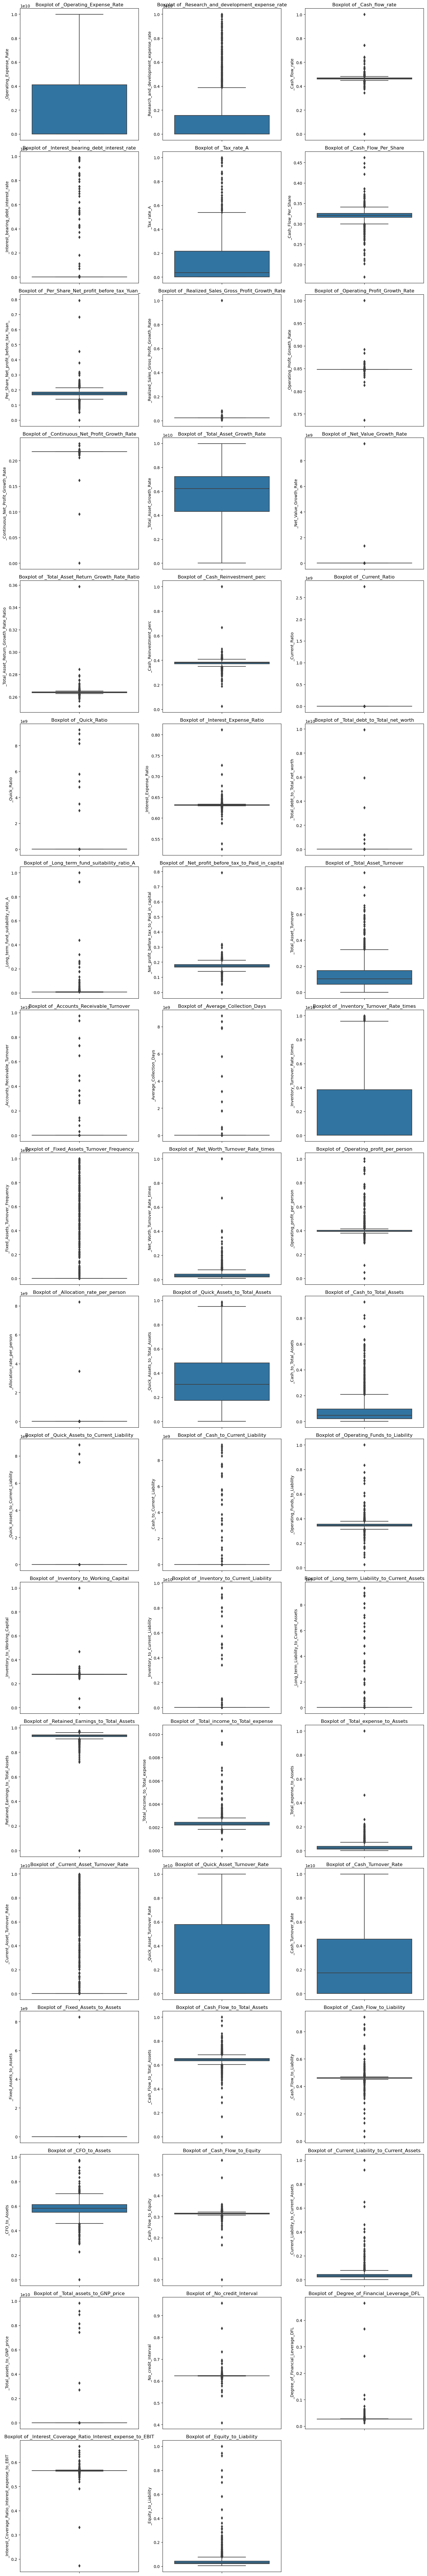

In [421]:
plt.figure(figsize = (15,100))
for i in range(len(feature_list_numeric)):
    plt.subplot(20, 3, i + 1)
    sns.boxplot(y = company_df[feature_list_numeric[i]], data = company_df)
    plt.title('Boxplot of {}'.format(feature_list_numeric[i]))
    plt.tight_layout()

In [422]:
#sns.histplot(y = '_Fixed_Assets_to_Assets', data = company_df, kde=True, bins=1);

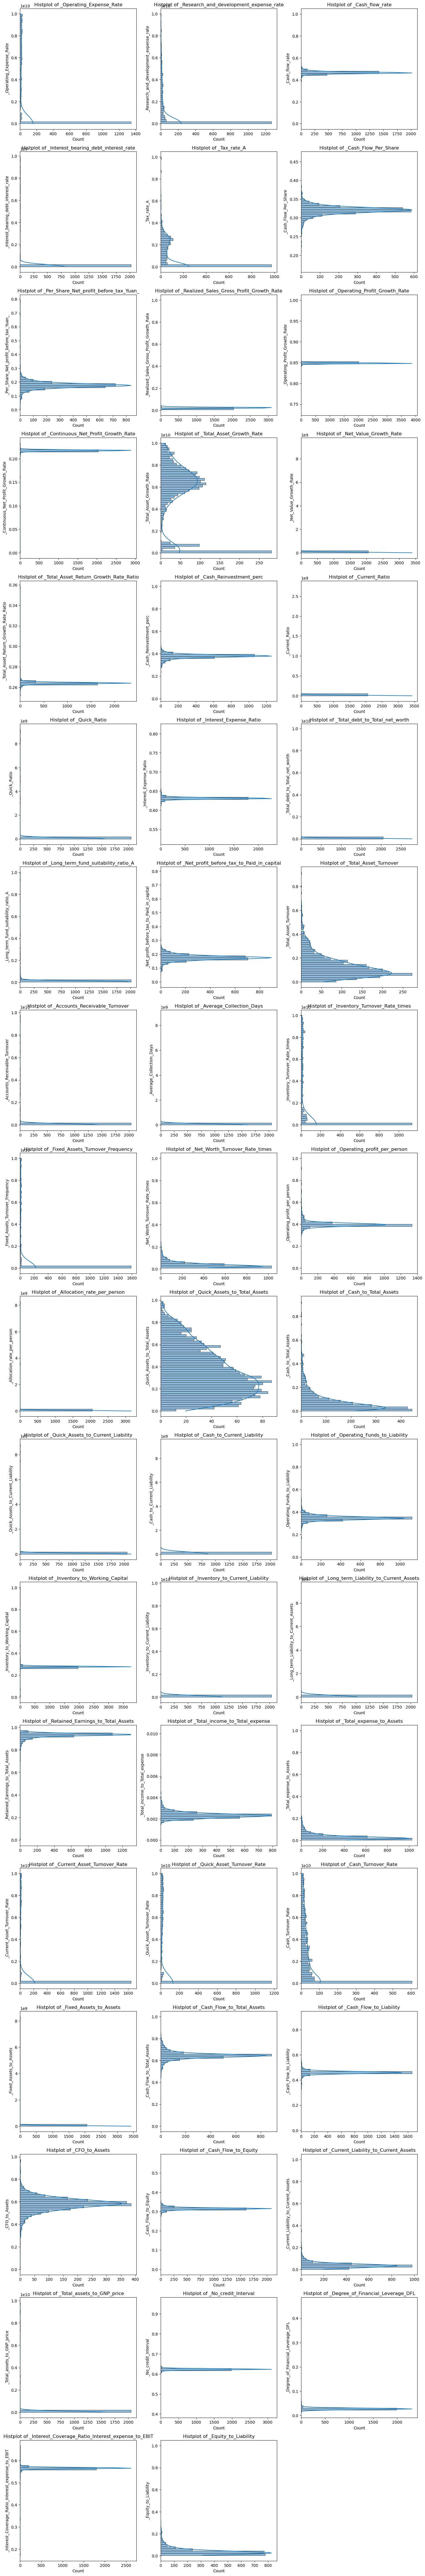

In [423]:
plt.figure(figsize = (15,100))
for i in range(len(feature_list_numeric)):
    plt.subplot(20, 3, i + 1)
    sns.histplot(y = company_df[feature_list_numeric[i]], data = company_df, kde = True, bins=50)
    plt.title('Histplot of {}'.format(feature_list_numeric[i]))
    plt.tight_layout()

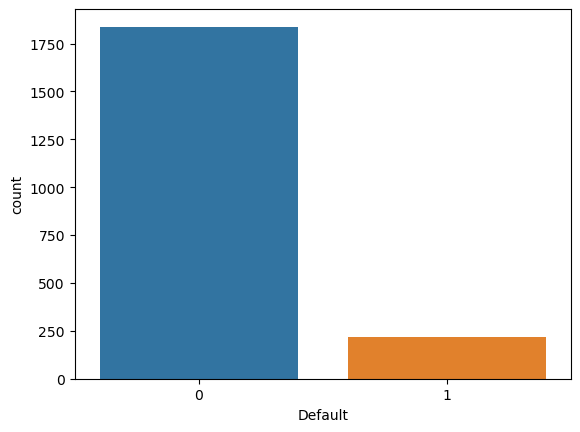

In [424]:
sns.countplot(x = 'Default', data = company_df);

<AxesSubplot:xlabel='_Net_Income_Flag', ylabel='count'>

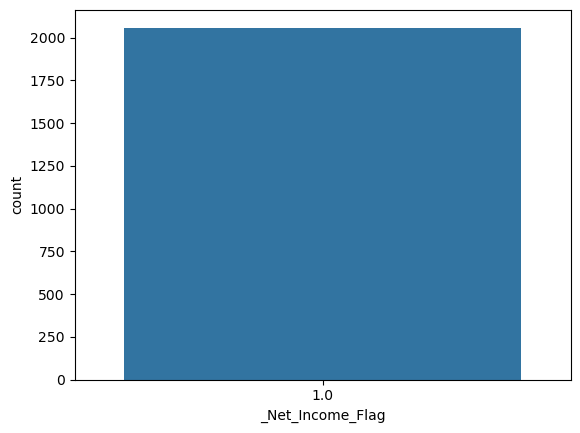

In [425]:
sns.countplot(x = '_Net_Income_Flag', data = company_df)

<AxesSubplot:xlabel='_Liability_Assets_Flag', ylabel='count'>

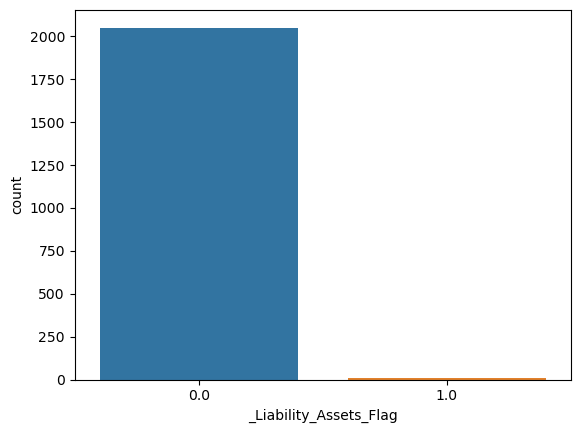

In [426]:
sns.countplot(x = '_Liability_Assets_Flag', data = company_df)

In [427]:
company_df['_Liability_Assets_Flag'].value_counts()

0.0    2051
1.0       7
Name: _Liability_Assets_Flag, dtype: int64

<AxesSubplot:>

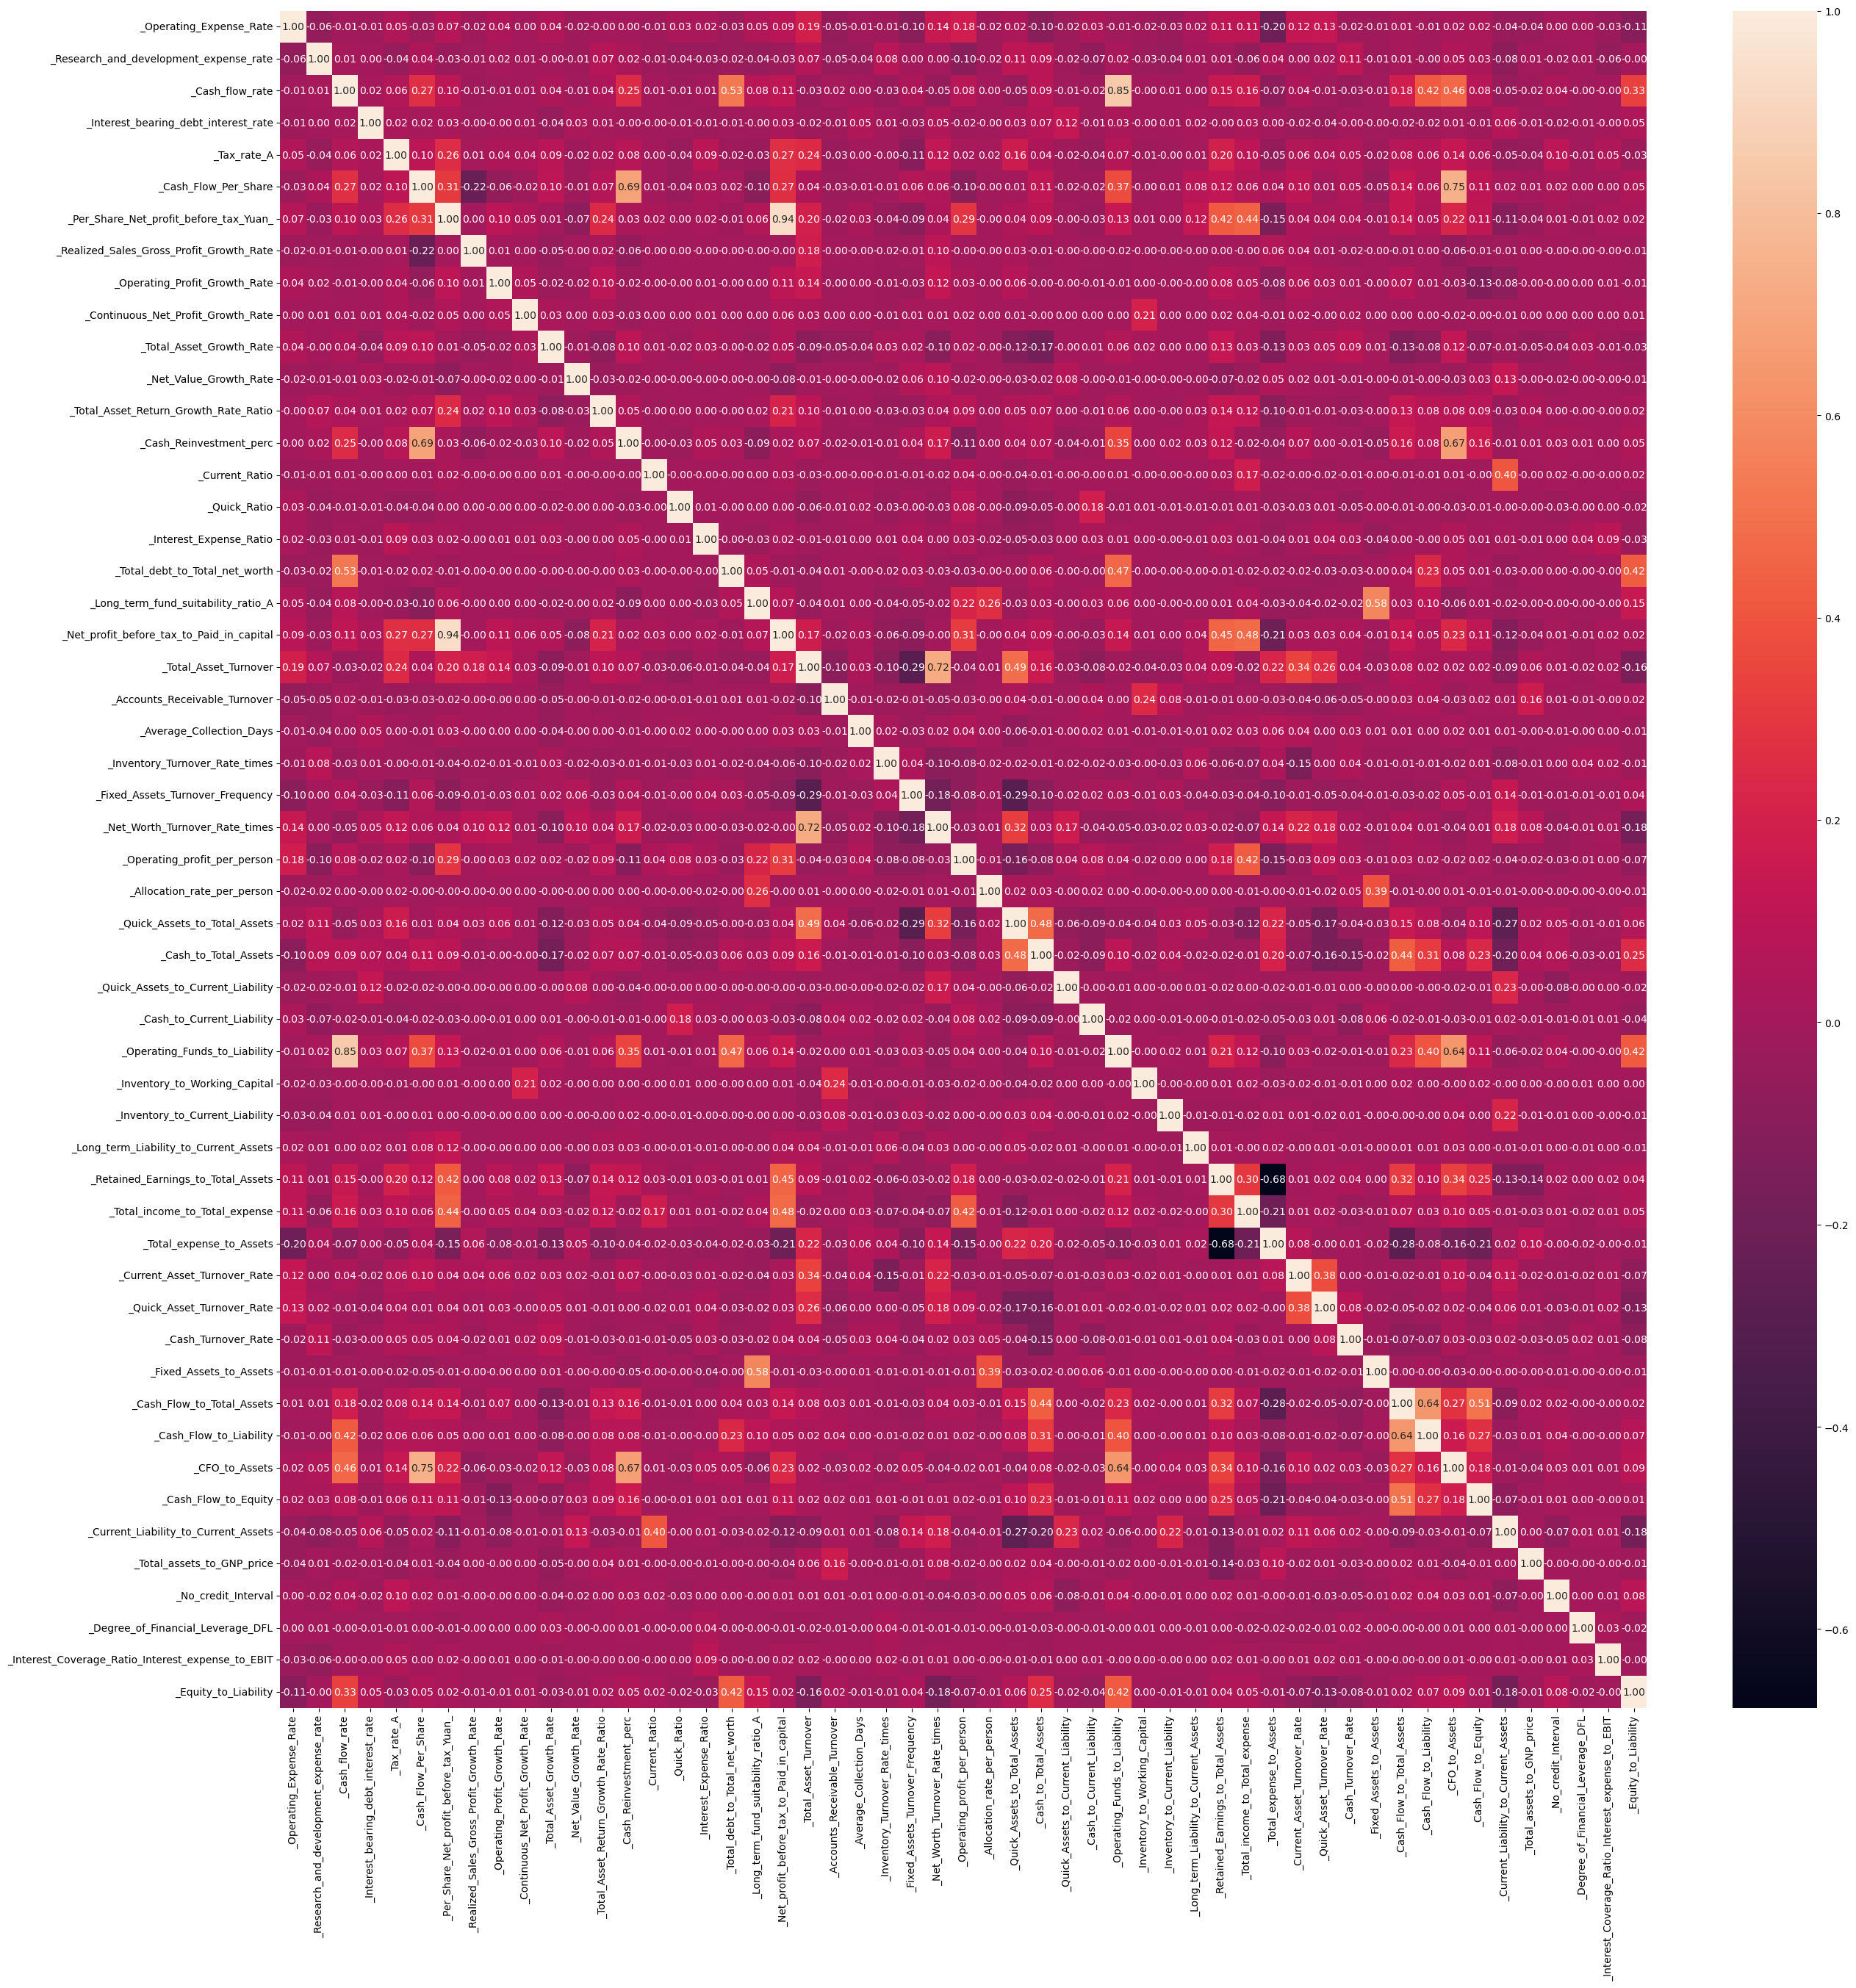

In [428]:
#Bivariate analysis1 - heatmap
#correlation map for all numeric columns
plt.figure(figsize = (30,30))
corr = Company_numeric.corr()
sns.heatmap(corr, annot = True, fmt = '.2f')

In [429]:
#sns.boxplot(x = company_df['Default'], y = company_df['_Interest_bearing_debt_interest_rate'], data = company_df)

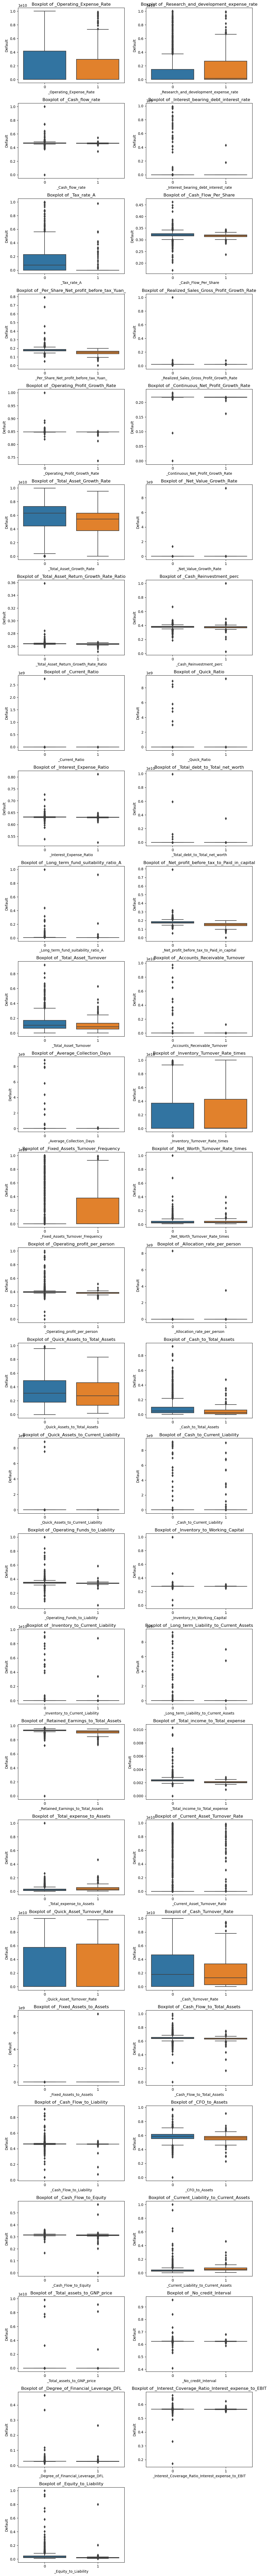

In [430]:
#Bivariate analysis 2 - box of all independent variables with dependent variable
plt.figure(figsize = (10,100))

for i in range(len(feature_list_numeric)):
    plt.subplot(27, 2, i + 1)
    sns.boxplot(x = company_df['Default'], y = company_df[feature_list_numeric[i]], data = company_df)    
    plt.title('Boxplot of {}'.format(feature_list_numeric[i]))
    plt.tight_layout()
    plt.xlabel(feature_list_numeric[i])
    plt.ylabel('Default')

In [431]:
#points that can be done from EDA:


In [432]:
#1. Drop net income flag column - all are 1 does not help in model building
company_df_scaled.drop('_Net_Income_Flag', axis = 1, inplace = True)
company_df_scaled.columns = company_df_scaled.columns.str.replace('_', '')
company_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OperatingExpenseRate                        2058 non-null   float64
 1   Researchanddevelopmentexpenserate           2058 non-null   float64
 2   Cashflowrate                                2058 non-null   float64
 3   Interestbearingdebtinterestrate             2058 non-null   float64
 4   TaxrateA                                    2058 non-null   float64
 5   CashFlowPerShare                            2058 non-null   float64
 6   PerShareNetprofitbeforetaxYuan              2058 non-null   float64
 7   RealizedSalesGrossProfitGrowthRate          2058 non-null   float64
 8   OperatingProfitGrowthRate                   2058 non-null   float64
 9   ContinuousNetProfitGrowthRate               2058 non-null   float64
 10  TotalAssetGr

In [433]:
Company_X = company_df_scaled.drop('Default', axis = 1)
Cpmpany_Y = company_df_scaled['Default']

In [434]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()


selector = RFE(estimator = LogR, n_features_to_select=30, step=1)

selector = selector.fit(Company_X,Company_Y)

selector.n_features_

selector.ranking_

array([ 1,  1,  9,  1,  5, 22, 20, 11, 10,  1, 19,  1,  1, 16,  1,  1, 12,
        1,  1,  1,  1,  1,  1,  7,  1, 13,  1,  1,  1, 21,  1,  1,  1, 14,
        1,  2,  1,  1,  1, 24, 23,  1,  3, 18,  8,  1, 17,  1,  4, 15,  6,
       25,  1,  1])

In [435]:
df = pd.DataFrame({'Feature': Company_X.columns, 'Rank': selector.ranking_})
df.sort_values(by = 'Rank')
df_2 = df[df['Rank']==1]
df_2

Feature  Rank
0                OperatingExpenseRate     1
1   Researchanddevelopmentexpenserate     1
3     Interestbearingdebtinterestrate     1
9       ContinuousNetProfitGrowthRate     1
11                 NetValueGrowthRate     1
12    TotalAssetReturnGrowthRateRatio     1
14                       CurrentRatio     1
15                         QuickRatio     1
17           TotaldebttoTotalnetworth     1
18      LongtermfundsuitabilityratioA     1
19  NetprofitbeforetaxtoPaidincapital     1
20                 TotalAssetTurnover     1
21         AccountsReceivableTurnover     1
22              AverageCollectionDays     1
24       FixedAssetsTurnoverFrequency     1
26           Operatingprofitperperson     1
27            Allocationrateperperson     1
28           QuickAssetstoTotalAssets     1
30      QuickAssetstoCurrentLiability     1
31             CashtoCurrentLiability     1
32          OperatingFundstoLiability     1
34        InventorytoCurrentLiability     1
36      RetainedEarningstoTotalAssets     1
37          TotalincometoTotalexpense     1
38               TotalexpensetoAssets     1
41                   CashTurnoverRate     1
45                        CFOtoAssets     1
47    CurrentLiabilitytoCurrentAssets     1
52                  EquitytoLiability     1
53                LiabilityAssetsFlag     1

In [436]:
company_df2 = company_df_scaled[list(df_2['Feature'])]
company_df2

OperatingExpenseRate  Researchanddevelopmentexpenserate  \
0                    2.146                             -0.000   
1                    2.282                              2.500   
2                    0.925                              0.526   
3                    1.567                             -0.000   
4                    0.895                             -0.000   
...                    ...                                ...   
2053                -0.000                              2.500   
2054                -0.000                             -0.000   
2055                -0.000                              2.500   
2056                 0.912                             -0.000   
2057                -0.000                             -0.000   

      Interestbearingdebtinterestrate  ContinuousNetProfitGrowthRate  \
0                              -0.264                      -0.125000   
1                               0.677                      -1.980625   
2                               0.109                      -0.503000   
3                               0.357                       1.452000   
4                               0.848                      -0.153000   
...                               ...                            ...   
2053                           -1.173                      -0.113000   
2054                            0.527                       0.916000   
2055                            0.124                      -1.573000   
2056                            0.320                      -0.187000   
2057                            0.961                       1.103000   

      NetValueGrowthRate  TotalAssetReturnGrowthRateRatio  CurrentRatio  \
0              -0.273000                         -0.20000      -0.08900   
1              -1.001000                         -0.52900      -0.28900   
2              -0.074000                          0.13700      -0.04000   
3              -0.139000                          1.31200       1.26900   
4              -0.018000                         -0.08700      -0.07500   
...                  ...                              ...           ...   
2053            0.269000                          0.78100       2.15725   
2054           -0.269000                         -0.45400       0.01100   
2055           -0.909000                         -1.98625      -0.27300   
2056           -0.671000                         -0.53000       0.79500   
2057            2.132375                          2.01375       0.05000   

      QuickRatio  TotaldebttoTotalnetworth  LongtermfundsuitabilityratioA  \
0        -0.8440                     2.054                        0.19900   
1        -0.0830                    -0.050                       -0.22900   
2         0.1050                    -0.347                       -0.30200   
3        -0.5950                     0.063                        2.21575   
4        -0.2210                     0.701                        0.24300   
...          ...                       ...                            ...   
2053      2.1085                    -0.721                        0.45800   
2054      0.4140                    -0.476                       -0.36000   
2055      0.0920                    -0.485                       -0.27800   
2056      0.5600                    -0.503                       -0.28300   
2057     -0.3770                     0.646                        2.21575   

      NetprofitbeforetaxtoPaidincapital  TotalAssetTurnover  \
0                                 0.984              -0.465   
1                                -0.747              -0.437   
2                                -0.163               0.479   
3                                -0.130              -0.014   
4                                 0.055               0.563   
...                                 ...                 ...   
2053                              0.928              -0.225   
2054                          

In [437]:
company_df3 = pd.concat([company_df2, company_df['Default']], axis=1)
company_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   OperatingExpenseRate               2058 non-null   float64
 1   Researchanddevelopmentexpenserate  2058 non-null   float64
 2   Interestbearingdebtinterestrate    2058 non-null   float64
 3   ContinuousNetProfitGrowthRate      2058 non-null   float64
 4   NetValueGrowthRate                 2058 non-null   float64
 5   TotalAssetReturnGrowthRateRatio    2058 non-null   float64
 6   CurrentRatio                       2058 non-null   float64
 7   QuickRatio                         2058 non-null   float64
 8   TotaldebttoTotalnetworth           2058 non-null   float64
 9   LongtermfundsuitabilityratioA      2058 non-null   float64
 10  NetprofitbeforetaxtoPaidincapital  2058 non-null   float64
 11  TotalAssetTurnover                 2058 non-null   float

In [438]:
Company_X = company_df3.drop('Default', axis = 1)
Cpmpany_Y = company_df3['Default']

In [439]:
#Split the data into train and test datasets in the ratio of 67:33 and use a random state of 42 (random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Company_X, Company_Y, test_size = 0.33, stratify = Company_Y, random_state = 42)

In [440]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [441]:
print(X_train.shape)
print(y_train.shape)

(1378, 30)
(1378,)


In [442]:
print(X_test.shape)
print(y_test.shape)

(680, 30)
(680,)


In [443]:
X_train.head()

OperatingExpenseRate  Researchanddevelopmentexpenserate  \
2011                 -0.00                             -0.000   
697                  -0.00                              1.129   
160                  -0.00                             -0.000   
1273                  1.45                              1.852   
541                  -0.00                              0.427   

      Interestbearingdebtinterestrate  ContinuousNetProfitGrowthRate  \
2011                            1.403                      -1.980625   
697                            -0.548                      -0.297000   
160                             0.638                      -1.489000   
1273                           -0.465                      -1.342000   
541                             0.292                      -1.980625   

      NetValueGrowthRate  TotalAssetReturnGrowthRateRatio  CurrentRatio  \
2011              -1.321                           -1.863         0.956   
697               -0.028                           -0.458         0.179   
160               -0.533                           -0.216        -0.244   
1273               0.791                           -0.597         0.072   
541               -0.571                           -0.892        -0.217   

      QuickRatio  TotaldebttoTotalnetworth  LongtermfundsuitabilityratioA  \
2011      -0.636                    -0.250                          1.979   
697        0.201                    -0.087                         -0.218   
160       -0.113                     0.364                         -0.166   
1273       0.544                     0.483                          1.126   
541       -0.277                     0.086                         -0.221   

      NetprofitbeforetaxtoPaidincapital  TotalAssetTurnover  \
2011                             -1.237              -0.211   
697                               0.954               0.620   
160                              -0.228              -0.577   
1273                             -0.483               2.106   
541                              -0.587              -0.014   

      AccountsReceivableTurnover  AverageCollectionDays  \
2011                       2.197                 -1.013   
697                       -0.420                  0.849   
160                        0.146                 -0.180   
1273                      -0.229                  0.322   
541                       -0.152                  0.184   

      FixedAssetsTurnoverFrequency  Operatingprofitperperson  \
2011                       0.03000                 -1.887625   
697                       -0.02700                  0.485000   
160                        2.45375                 -0.324000   
1273                       0.25800                  0.039000   
541                       -0.05300                 -0.449000   

      Allocationrateperperson  QuickAssetstoTotalAssets  \
2011                    0.366                    -0.629   
697                     0.156                     0.391   
160                     0.738                    -0.428   
1273                   -0.334                     1.632   
541                     0.369                    -0.321   

      QuickAssetstoCurrentLiability  CashtoCurrentLiability  \
2011                         -0.677                  -0.065   
697                           0.105                   0.298   
160                          -0.069                   0.395   
1273                          0.440                   0.011   
541                          -0.402                  -0.381   

      OperatingFundstoLiability  InventorytoCurrentLiability  \
2011                     2.0555                       2.1065   
697                      0.5530                       0.2870   
160                     -0.4140                      -0.2080   
1273                    -0.0570                      -0.4330   
541                     -0.3740                       0.3630   

      RetainedEarningstoTotalA

In [444]:
y_train.head()

2011    0
697     0
160     0
1273    0
541     0
Name: Default, dtype: int64

In [445]:
X_test.head()

OperatingExpenseRate  Researchanddevelopmentexpenserate  \
974                 -0.000                              0.768   
134                 -0.000                             -0.000   
1267                -0.000                             -0.000   
464                  0.000                             -0.000   
579                  0.956                             -0.000   

      Interestbearingdebtinterestrate  ContinuousNetProfitGrowthRate  \
974                             1.183                          0.561   
134                            -0.318                          0.241   
1267                           -1.173                         -0.058   
464                             0.798                         -0.288   
579                            -1.173                          0.090   

      NetValueGrowthRate  TotalAssetReturnGrowthRateRatio  CurrentRatio  \
974                0.518                            0.645         0.317   
134                0.555                            0.611        -0.007   
1267              -0.374                            0.216         1.688   
464                0.482                           -1.123        -0.429   
579               -0.072                            0.000         0.444   

      QuickRatio  TotaldebttoTotalnetworth  LongtermfundsuitabilityratioA  \
974        0.146                    -0.125                         -0.267   
134       -0.732                     0.619                          0.705   
1267       1.320                    -0.658                         -0.270   
464       -0.054                    -0.568                         -0.160   
579        0.553                    -0.130                          0.104   

      NetprofitbeforetaxtoPaidincapital  TotalAssetTurnover  \
974                               0.908               1.183   
134                               0.578              -0.549   
1267                             -0.435               0.014   
464                               0.861               0.873   
579                               0.050               0.915   

      AccountsReceivableTurnover  AverageCollectionDays  \
974                        1.185                 -0.664   
134                        0.812                 -0.555   
1267                       0.144                 -0.179   
464                        2.197                 -1.145   
579                        0.066                 -0.104   

      FixedAssetsTurnoverFrequency  Operatingprofitperperson  \
974                         -0.037                  0.280000   
134                         -0.029                  2.111375   
1267                        -0.060                 -0.431000   
464                         -0.046                  0.422000   
579                         -0.004                 -0.129000   

      Allocationrateperperson  QuickAssetstoTotalAssets  \
974                    -0.179                    -0.048   
134                     0.881                    -0.549   
1267                   -0.117                    -0.079   
464                    -0.273                    -0.453   
579                    -0.046                     0.870   

      QuickAssetstoCurrentLiability  CashtoCurrentLiability  \
974                           0.090                   1.154   
134                          -0.775                  -0.126   
1267                          1.484                   1.664   
464                          -0.018                   0.626   
579                           0.590                   0.130   

      OperatingFundstoLiability  InventorytoCurrentLiability  \
974                      1.2460                        0.562   
134                     -0.9950                        1.328   
1267                    -0.2000                        0.865   
464                      2.0555                       -0.624   
579                     -0.2400                        0.008   

      RetainedEarningstoTotalA

In [446]:
y_test.head()

974     0
134     0
1267    0
464     0
579     0
Name: Default, dtype: int64

In [447]:
X_train.columns

Index(['OperatingExpenseRate', 'Researchanddevelopmentexpenserate',
       'Interestbearingdebtinterestrate', 'ContinuousNetProfitGrowthRate',
       'NetValueGrowthRate', 'TotalAssetReturnGrowthRateRatio', 'CurrentRatio',
       'QuickRatio', 'TotaldebttoTotalnetworth',
       'LongtermfundsuitabilityratioA', 'NetprofitbeforetaxtoPaidincapital',
       'TotalAssetTurnover', 'AccountsReceivableTurnover',
       'AverageCollectionDays', 'FixedAssetsTurnoverFrequency',
       'Operatingprofitperperson', 'Allocationrateperperson',
       'QuickAssetstoTotalAssets', 'QuickAssetstoCurrentLiability',
       'CashtoCurrentLiability', 'OperatingFundstoLiability',
       'InventorytoCurrentLiability', 'RetainedEarningstoTotalAssets',
       'TotalincometoTotalexpense', 'TotalexpensetoAssets', 'CashTurnoverRate',
       'CFOtoAssets', 'CurrentLiabilitytoCurrentAssets', 'EquitytoLiability',
       'LiabilityAssetsFlag'],
      dtype='object')

In [448]:
#Logistic Regression Model

import statsmodels.formula.api as sm
f_1 = 'Default ~ OperatingExpenseRate + Researchanddevelopmentexpenserate + Interestbearingdebtinterestrate + ContinuousNetProfitGrowthRate + NetValueGrowthRate + TotalAssetReturnGrowthRateRatio + CurrentRatio + QuickRatio + TotaldebttoTotalnetworth + LongtermfundsuitabilityratioA + NetprofitbeforetaxtoPaidincapital + TotalAssetTurnover + AccountsReceivableTurnover + AverageCollectionDays + FixedAssetsTurnoverFrequency + Operatingprofitperperson + Allocationrateperperson + QuickAssetstoTotalAssets + QuickAssetstoCurrentLiability + CashtoCurrentLiability + OperatingFundstoLiability + InventorytoCurrentLiability + RetainedEarningstoTotalAssets + TotalincometoTotalexpense + TotalexpensetoAssets + CashTurnoverRate + CFOtoAssets + CurrentLiabilitytoCurrentAssets + EquitytoLiability + LiabilityAssetsFlag'

In [449]:
model1 = sm.logit(formula = f_1, data = company_df3).fit()

Optimization terminated successfully.
         Current function value: 0.187226
         Iterations 9


In [450]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2058
Model:                          Logit   Df Residuals:                     2027
Method:                           MLE   Df Model:                           30
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:                  0.4493
Time:                        18:45:04   Log-Likelihood:                -385.31
converged:                       True   LL-Null:                       -699.69
Covariance Type:            nonrobust   LLR p-value:                3.250e-113
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -4.2838      0.296    -14.474      0.000      -4.864      -3.704
OperatingExpenseRate                  0.1821      0.136      1.338      0.181      -0.085       0.449
Researchanddevelopmentexpenserate     0.4009      0.108      3.696      0.000       0.188       0.614
Interestbearingdebtinterestrate       0.3682      0.157      2.347      0.019       0.061       0.676
ContinuousNetProfitGrowthRate        -0.2264      0.144     -1.577      0.115      -0.508       0.055
NetValueGrowthRate                   -0.2994      0.137     -2.183      0.029      -0.568      -0.031
TotalAssetReturnGrowthRateRatio       0.2760      0.155      1.783      0.075      -0.027       0.579
CurrentRatio                          0.8349      0.495      1.688      0.091      -0.134       1.804
QuickRatio                           -1.0961      0.414     -2.648      0.008      -1.908      -0.285
TotaldebttoTotalnetworth              0.5457      0.202      2.703      0.007       0.150       0.941
LongtermfundsuitabilityratioA         0.3711      0.147      2.522      0.012       0.083       0.659
NetprofitbeforetaxtoPaidincapital    -0.4301      0.304     -1.414      0.157      -1.027       0.166
TotalAssetTurnover                   -0.1449      0.228     -0.636      0.525      -0.591       0.302
AccountsReceivableTurnover           -0.6113      0.171     -3.576      0.000      -0.946      -0.276
AverageCollectionDays                 0.2245      0.182      1.235      0.217      -0.132       0.581
FixedAssetsTurnoverFrequency          0.1333      0.105      1.265      0.206      -0.073       0.340
Operatingprofitperperson              0.2615      0.147      1.781      0.075      -0.026       0.549
Allocationrateperperson               0.5792      0.163      3.554      0.000       0.260       0.899
QuickAssetstoTotalAssets             -0.3744      0.307     -1.218      0.223      -0.977       0.228
QuickAssetstoCurrentLiability         0.2591      0.465      0.557      0.577      -0.652       1.170
CashtoCurrentLiability                0.1566      0.159      0.986      0.324      -0.155       0.468
OperatingFundstoLiability             0.3924      0.444      0.884      0.377      -0.477       1.262
InventorytoCurrentLiability          -0.3878      0.272     -1.428      0.153      -0.920       0.144
RetainedEarningstoTotalAssets        -0.5943      0.215     -2.762      0.006      -1.016      -0.173
TotalincometoTotalexpense            -0.4789      0.303     -1.581      0.114      -1.072       0.115
TotalexpensetoAssets                  0.4302      0.185      2.326      0.020       0.068       0.793
CashTurnoverRate                     -0.5598      0.186     -3.012      0.003      -0.924      -0.196
CFOtoAssets                          -0.5605      0.372     -1.507      0.132      -1.290       0.169
CurrentLiabilitytoCurrentAssets       0.2347      0.286      0.822      0.411  

In [451]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [452]:
X = company_df3.drop('Default', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables        VIF
18      QuickAssetstoCurrentLiability  19.614185
6                        CurrentRatio  14.856060
7                          QuickRatio  12.988497
20          OperatingFundstoLiability   7.912648
10  NetprofitbeforetaxtoPaidincapital   7.268975
26                        CFOtoAssets   6.900905
27    CurrentLiabilitytoCurrentAssets   6.049353
28                  EquitytoLiability   5.736218
22      RetainedEarningstoTotalAssets   4.934115
23          TotalincometoTotalexpense   4.717501
17           QuickAssetstoTotalAssets   4.246279
21        InventorytoCurrentLiability   3.242692
8            TotaldebttoTotalnetworth   3.115746
5     TotalAssetReturnGrowthRateRatio   2.823870
11                 TotalAssetTurnover   2.808594
19             CashtoCurrentLiability   2.757314
12         AccountsReceivableTurnover   2.693366
15           Operatingprofitperperson   2.682514
3       ContinuousNetProfitGrowthRate   2.517664
16            Allocationrateperperson   2.367380
13              AverageCollectionDays   2.273547
4                  NetValueGrowthRate   2.270418
24               TotalexpensetoAssets   2.209165
14       FixedAssetsTurnoverFrequency   1.868417
9       LongtermfundsuitabilityratioA   1.698698
0                OperatingExpenseRate   1.625370
1   Researchanddevelopmentexpenserate   1.414828
25                   CashTurnoverRate   1.142578
2     Interestbearingdebtinterestrate   1.107938
29                LiabilityAssetsFlag   1.059592

In [453]:
X = X.drop(['QuickAssetstoCurrentLiability','CurrentRatio', 'QuickRatio', 'OperatingFundstoLiability', 'NetprofitbeforetaxtoPaidincapital', 'CFOtoAssets', 'CurrentLiabilitytoCurrentAssets', 'EquitytoLiability'], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
18          TotalincometoTotalexpense  3.940493
17      RetainedEarningstoTotalAssets  3.136905
14           QuickAssetstoTotalAssets  2.797612
8                  TotalAssetTurnover  2.690763
5     TotalAssetReturnGrowthRateRatio  2.656288
9          AccountsReceivableTurnover  2.567197
12           Operatingprofitperperson  2.560298
3       ContinuousNetProfitGrowthRate  2.507583
13            Allocationrateperperson  2.314367
10              AverageCollectionDays  2.222890
19               TotalexpensetoAssets  2.057498
4                  NetValueGrowthRate  1.985550
15             CashtoCurrentLiability  1.806226
11       FixedAssetsTurnoverFrequency  1.692774
6            TotaldebttoTotalnetworth  1.674316
0                OperatingExpenseRate  1.585820
7       LongtermfundsuitabilityratioA  1.579989
16        InventorytoCurrentLiability  1.465435
1   Researchanddevelopmentexpenserate  1.370429
20                   CashTurnoverRate  1.131946
2     Interestbearingdebtinterestrate  1.069952
21                LiabilityAssetsFlag  1.039450

In [454]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   OperatingExpenseRate               2058 non-null   float64
 1   Researchanddevelopmentexpenserate  2058 non-null   float64
 2   Interestbearingdebtinterestrate    2058 non-null   float64
 3   ContinuousNetProfitGrowthRate      2058 non-null   float64
 4   NetValueGrowthRate                 2058 non-null   float64
 5   TotalAssetReturnGrowthRateRatio    2058 non-null   float64
 6   TotaldebttoTotalnetworth           2058 non-null   float64
 7   LongtermfundsuitabilityratioA      2058 non-null   float64
 8   TotalAssetTurnover                 2058 non-null   float64
 9   AccountsReceivableTurnover         2058 non-null   float64
 10  AverageCollectionDays              2058 non-null   float64
 11  FixedAssetsTurnoverFrequency       2058 non-null   float

In [455]:
y = company_df['Default']

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [457]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [458]:
X_train.columns

Index(['OperatingExpenseRate', 'Researchanddevelopmentexpenserate',
       'Interestbearingdebtinterestrate', 'ContinuousNetProfitGrowthRate',
       'NetValueGrowthRate', 'TotalAssetReturnGrowthRateRatio',
       'TotaldebttoTotalnetworth', 'LongtermfundsuitabilityratioA',
       'TotalAssetTurnover', 'AccountsReceivableTurnover',
       'AverageCollectionDays', 'FixedAssetsTurnoverFrequency',
       'Operatingprofitperperson', 'Allocationrateperperson',
       'QuickAssetstoTotalAssets', 'CashtoCurrentLiability',
       'InventorytoCurrentLiability', 'RetainedEarningstoTotalAssets',
       'TotalincometoTotalexpense', 'TotalexpensetoAssets', 'CashTurnoverRate',
       'LiabilityAssetsFlag'],
      dtype='object')

In [459]:
f_2 = 'Default ~  OperatingExpenseRate +  Researchanddevelopmentexpenserate +  Interestbearingdebtinterestrate +  ContinuousNetProfitGrowthRate +  NetValueGrowthRate +  TotalAssetReturnGrowthRateRatio +  TotaldebttoTotalnetworth +  LongtermfundsuitabilityratioA +  TotalAssetTurnover +  AccountsReceivableTurnover +  AverageCollectionDays +  FixedAssetsTurnoverFrequency +  Operatingprofitperperson +  Allocationrateperperson +  QuickAssetstoTotalAssets +  CashtoCurrentLiability +  InventorytoCurrentLiability +  RetainedEarningstoTotalAssets +  TotalincometoTotalexpense +  TotalexpensetoAssets +  CashTurnoverRate +  LiabilityAssetsFlag'

In [460]:
model_2 = sm.logit(formula = f_2, data = Default_train).fit()

         Current function value: 0.199490
         Iterations: 35


C:\Users\yamin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [461]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1355
Method:                           MLE   Df Model:                           22
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:                  0.4278
Time:                        18:45:08   Log-Likelihood:                -274.90
converged:                      False   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.074e-73
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -4.4480      0.332    -13.385      0.000      -5.099      -3.797
OperatingExpenseRate                  0.1390      0.163      0.853      0.394      -0.180       0.458
Researchanddevelopmentexpenserate     0.4756      0.125      3.820      0.000       0.232       0.720
Interestbearingdebtinterestrate       0.5855      0.186      3.140      0.002       0.220       0.951
ContinuousNetProfitGrowthRate        -0.2112      0.172     -1.230      0.219      -0.548       0.125
NetValueGrowthRate                   -0.3093      0.171     -1.812      0.070      -0.644       0.025
TotalAssetReturnGrowthRateRatio       0.2665      0.184      1.448      0.147      -0.094       0.627
TotaldebttoTotalnetworth              1.0825      0.163      6.656      0.000       0.764       1.401
LongtermfundsuitabilityratioA         0.2946      0.170      1.736      0.082      -0.038       0.627
TotalAssetTurnover                   -0.2178      0.257     -0.849      0.396      -0.721       0.285
AccountsReceivableTurnover           -0.5605      0.197     -2.851      0.004      -0.946      -0.175
AverageCollectionDays                 0.1139      0.203      0.561      0.575      -0.284       0.512
FixedAssetsTurnoverFrequency          0.1335      0.120      1.110      0.267      -0.102       0.369
Operatingprofitperperson              0.5110      0.185      2.760      0.006       0.148       0.874
Allocationrateperperson               0.6752      0.193      3.496      0.000       0.297       1.054
QuickAssetstoTotalAssets             -0.2812      0.285     -0.986      0.324      -0.840       0.278
CashtoCurrentLiability               -0.0880      0.165     -0.533      0.594      -0.412       0.236
InventorytoCurrentLiability          -0.1203      0.203     -0.593      0.553      -0.518       0.277
RetainedEarningstoTotalAssets        -0.7064      0.231     -3.056      0.002      -1.160      -0.253
TotalincometoTotalexpense            -1.0214      0.336     -3.039      0.002      -1.680      -0.363
TotalexpensetoAssets                  0.5128      0.199      2.571      0.010       0.122       0.904
CashTurnoverRate                     -0.3433      0.206     -1.668      0.095      -0.747       0.060
LiabilityAssetsFlag                   9.3155     81.194      0.115      0.909    -149.821     168.452
=====================================================================================================
"""

In [462]:
#Remove: OperatingExpenseRate, ContinuousNetProfitGrowthRate, TotalAssetReturnGrowthRateRatio, TotalAssetTurnover, AverageCollectionDays, FixedAssetsTurnoverFrequency,QuickAssetstoTotalAssets, CashtoCurrentLiability, InventorytoCurrentLiability, CashTurnoverRate, LiabilityAssetsFlag 

In [463]:
X = X.drop(['OperatingExpenseRate','ContinuousNetProfitGrowthRate','TotalAssetReturnGrowthRateRatio','TotalAssetTurnover','AverageCollectionDays','FixedAssetsTurnoverFrequency','QuickAssetstoTotalAssets','CashtoCurrentLiability','InventorytoCurrentLiability','CashTurnoverRate','LiabilityAssetsFlag'], axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Researchanddevelopmentexpenserate  2058 non-null   float64
 1   Interestbearingdebtinterestrate    2058 non-null   float64
 2   NetValueGrowthRate                 2058 non-null   float64
 3   TotaldebttoTotalnetworth           2058 non-null   float64
 4   LongtermfundsuitabilityratioA      2058 non-null   float64
 5   AccountsReceivableTurnover         2058 non-null   float64
 6   Operatingprofitperperson           2058 non-null   float64
 7   Allocationrateperperson            2058 non-null   float64
 8   RetainedEarningstoTotalAssets      2058 non-null   float64
 9   TotalincometoTotalexpense          2058 non-null   float64
 10  TotalexpensetoAssets               2058 non-null   float64
dtypes: float64(11)
memory usage: 177.0 KB


In [464]:
y = company_df['Default']

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [466]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [467]:
X_train.columns

Index(['Researchanddevelopmentexpenserate', 'Interestbearingdebtinterestrate',
       'NetValueGrowthRate', 'TotaldebttoTotalnetworth',
       'LongtermfundsuitabilityratioA', 'AccountsReceivableTurnover',
       'Operatingprofitperperson', 'Allocationrateperperson',
       'RetainedEarningstoTotalAssets', 'TotalincometoTotalexpense',
       'TotalexpensetoAssets'],
      dtype='object')

In [468]:
f_3 = 'Default ~ Researchanddevelopmentexpenserate + Interestbearingdebtinterestrate + NetValueGrowthRate + TotaldebttoTotalnetworth + LongtermfundsuitabilityratioA + AccountsReceivableTurnover + Operatingprofitperperson + Allocationrateperperson + RetainedEarningstoTotalAssets + TotalincometoTotalexpense + TotalexpensetoAssets'

In [469]:
model_3 = sm.logit(formula = f_3, data = Default_train).fit()

model_3.summary()

Optimization terminated successfully.
         Current function value: 0.204475
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1366
Method:                           MLE   Df Model:                           11
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:                  0.4135
Time:                        18:45:08   Log-Likelihood:                -281.77
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.196e-78
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -4.4008      0.296    -14.866      0.000      -4.981      -3.821
Researchanddevelopmentexpenserate     0.4402      0.119      3.708      0.000       0.207       0.673
Interestbearingdebtinterestrate       0.5974      0.176      3.397      0.001       0.253       0.942
NetValueGrowthRate                   -0.2803      0.155     -1.807      0.071      -0.584       0.024
TotaldebttoTotalnetworth              1.0143      0.146      6.969      0.000       0.729       1.300
LongtermfundsuitabilityratioA         0.1651      0.153      1.079      0.280      -0.135       0.465
AccountsReceivableTurnover           -0.6229      0.151     -4.115      0.000      -0.920      -0.326
Operatingprofitperperson              0.5393      0.176      3.065      0.002       0.194       0.884
Allocationrateperperson               0.8339      0.164      5.075      0.000       0.512       1.156
RetainedEarningstoTotalAssets        -0.8461      0.216     -3.923      0.000      -1.269      -0.423
TotalincometoTotalexpense            -1.1653      0.311     -3.744      0.000      -1.775      -0.555
TotalexpensetoAssets                  0.3218      0.176      1.827      0.068      -0.023       0.667
=====================================================================================================
"""

In [470]:
X = X.drop(['NetValueGrowthRate', 'LongtermfundsuitabilityratioA', 'TotalexpensetoAssets'], axis = 1)

In [471]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Researchanddevelopmentexpenserate  2058 non-null   float64
 1   Interestbearingdebtinterestrate    2058 non-null   float64
 2   TotaldebttoTotalnetworth           2058 non-null   float64
 3   AccountsReceivableTurnover         2058 non-null   float64
 4   Operatingprofitperperson           2058 non-null   float64
 5   Allocationrateperperson            2058 non-null   float64
 6   RetainedEarningstoTotalAssets      2058 non-null   float64
 7   TotalincometoTotalexpense          2058 non-null   float64
dtypes: float64(8)
memory usage: 128.8 KB


In [472]:
y = company_df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [473]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [474]:
X_train.columns

Index(['Researchanddevelopmentexpenserate', 'Interestbearingdebtinterestrate',
       'TotaldebttoTotalnetworth', 'AccountsReceivableTurnover',
       'Operatingprofitperperson', 'Allocationrateperperson',
       'RetainedEarningstoTotalAssets', 'TotalincometoTotalexpense'],
      dtype='object')

In [475]:
f_4 = 'Default ~ Researchanddevelopmentexpenserate + Interestbearingdebtinterestrate + TotaldebttoTotalnetworth + AccountsReceivableTurnover + Operatingprofitperperson + Allocationrateperperson + RetainedEarningstoTotalAssets + TotalincometoTotalexpense'

In [476]:
model_4 = sm.logit(formula = f_4, data = Default_train).fit()

model_4.summary()

Optimization terminated successfully.
         Current function value: 0.208093
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1369
Method:                           MLE   Df Model:                            8
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:                  0.4032
Time:                        18:45:09   Log-Likelihood:                -286.75
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 9.207e-79
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -4.2780      0.262    -16.338      0.000      -4.791      -3.765
Researchanddevelopmentexpenserate     0.4415      0.115      3.834      0.000       0.216       0.667
Interestbearingdebtinterestrate       0.5103      0.171      2.983      0.003       0.175       0.846
TotaldebttoTotalnetworth              1.0294      0.137      7.536      0.000       0.762       1.297
AccountsReceivableTurnover           -0.5767      0.148     -3.896      0.000      -0.867      -0.287
Operatingprofitperperson              0.4725      0.176      2.683      0.007       0.127       0.818
Allocationrateperperson               0.6653      0.135      4.930      0.000       0.401       0.930
RetainedEarningstoTotalAssets        -1.0470      0.193     -5.434      0.000      -1.425      -0.669
TotalincometoTotalexpense            -1.2461      0.284     -4.384      0.000      -1.803      -0.689
=====================================================================================================
"""

In [477]:
y_prob_pred_train = model_4.predict(Default_train)

In [478]:
print(y_prob_pred_train)

631     0.041117
1799    0.014842
1924    0.000846
1629    0.007006
363     0.000575
          ...   
1638    0.707711
1095    0.001929
1130    0.187144
1294    0.003627
860     0.001308
Length: 1378, dtype: float64


In [479]:
y_train_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_train_pred.append(a)

In [480]:
from sklearn import metrics

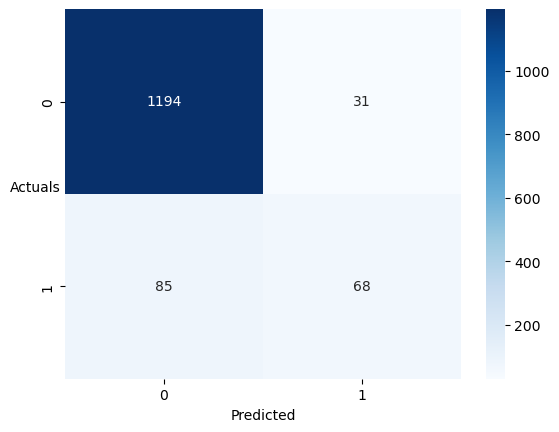

In [481]:
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_train_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [482]:
print(metrics.classification_report(Default_train['Default'],y_train_pred,digits=3))

              precision    recall  f1-score   support

           0      0.934     0.975     0.954      1225
           1      0.687     0.444     0.540       153

    accuracy                          0.916      1378
   macro avg      0.810     0.710     0.747      1378
weighted avg      0.906     0.916     0.908      1378



In [483]:
#choosing optimal threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['Default'],y_prob_pred_train)

In [484]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.12407010627445494

In [526]:
#Validation with optimal threshold on training set
y_train_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.12:
        a=1
    else:
        a=0
    y_train_pred.append(a)

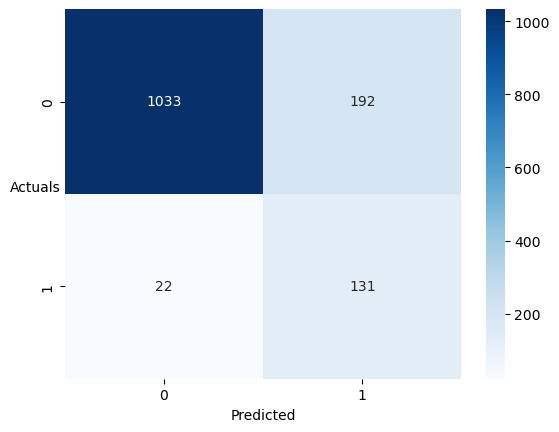

In [527]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(Default_train['Default'],y_train_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [528]:
print(metrics.classification_report(Default_train['Default'],y_train_pred,digits=3))

              precision    recall  f1-score   support

           0      0.979     0.843     0.906      1225
           1      0.406     0.856     0.550       153

    accuracy                          0.845      1378
   macro avg      0.692     0.850     0.728      1378
weighted avg      0.915     0.845     0.867      1378



In [485]:
#Validation on test set

y_prob_pred_test = model_4.predict(Default_test)

In [486]:
y_test_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.12:
        a=1
    else:
        a=0
    y_test_pred.append(a)


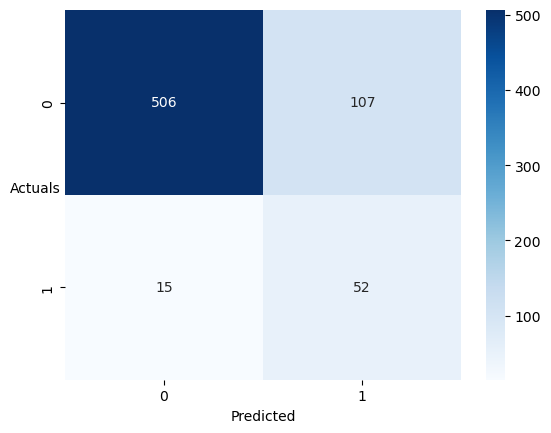

In [487]:
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],y_test_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [488]:
print(metrics.classification_report(Default_test['Default'],y_test_pred,digits=3))

              precision    recall  f1-score   support

           0      0.971     0.825     0.892       613
           1      0.327     0.776     0.460        67

    accuracy                          0.821       680
   macro avg      0.649     0.801     0.676       680
weighted avg      0.908     0.821     0.850       680



AUC ROC score on training data: 0.7095691609977325


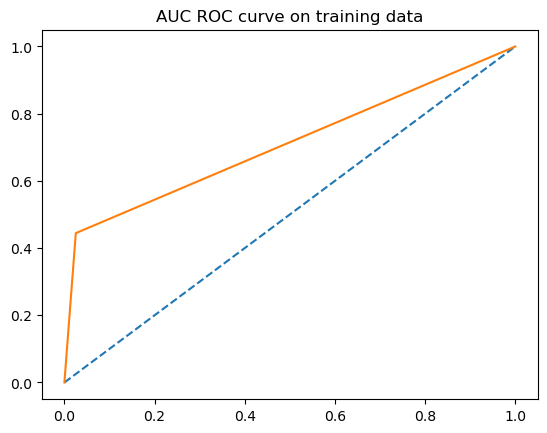

In [489]:
#AUC score
#ROC curve on training data
#ROC_AUC score on training data

#y_train_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(Default_train['Default'], y_train_pred)
print('AUC ROC score on training data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on training data")
train_fpr, train_tpr , _ = metrics.roc_curve(Default_train['Default'], y_train_pred)

# plot the roc curve for the model
plt.plot(train_fpr,train_tpr);

AUC ROC score on test data: 0.800784008180955


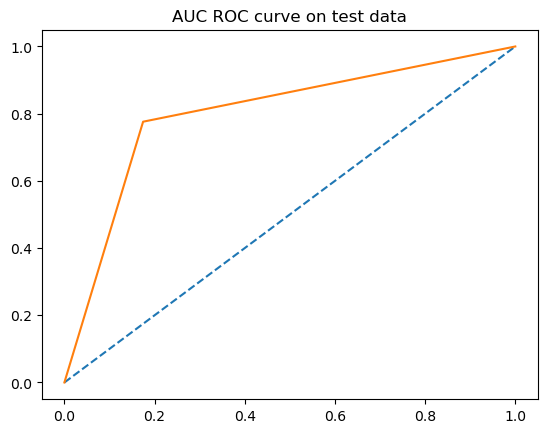

In [490]:
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(Default_test['Default'], y_test_pred)
print('AUC ROC score on test data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on test data")
fpr, tpr , _ = metrics.roc_curve(Default_test['Default'], y_test_pred)

# plot the roc curve for the model
plt.plot(fpr,tpr);

In [491]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [492]:
selector_smote = selector.fit(X_res, y_res)

In [493]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

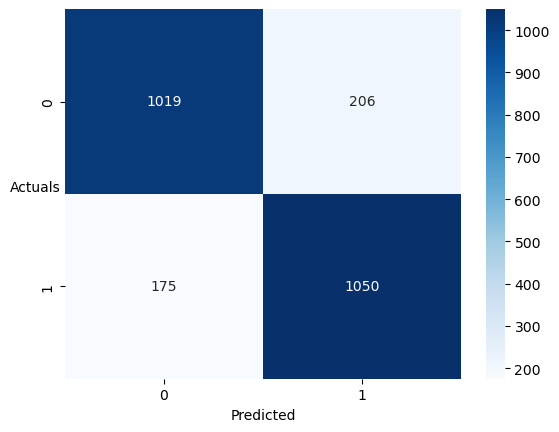

In [494]:
sns.heatmap((metrics.confusion_matrix(y_res,pred_train_smote)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [495]:
y_class_pred=[]
for i in range(0,len(pred_test_smote)):
    if np.array(pred_test_smote)[i]>0.12:
        a=1
    else:
        a=0
    y_class_pred.append(a)

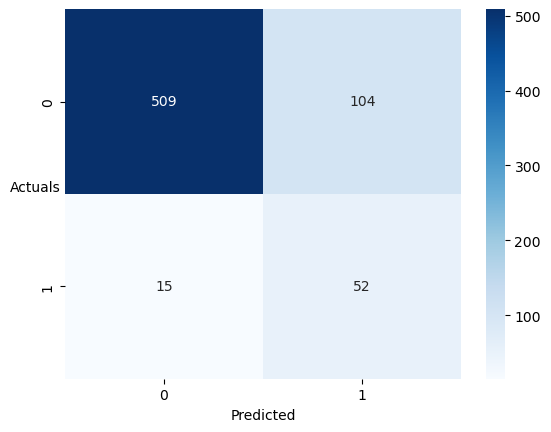

In [496]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_smote)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [497]:
print(metrics.classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1225
           1       0.84      0.86      0.85      1225

    accuracy                           0.84      2450
   macro avg       0.84      0.84      0.84      2450
weighted avg       0.84      0.84      0.84      2450



In [498]:
print(metrics.classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       613
           1       0.33      0.78      0.47        67

    accuracy                           0.82       680
   macro avg       0.65      0.80      0.68       680
weighted avg       0.91      0.82      0.85       680



In [534]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [535]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier(random_state = 1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 50}

In [536]:
best_grid = grid_search.best_estimator_

In [537]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

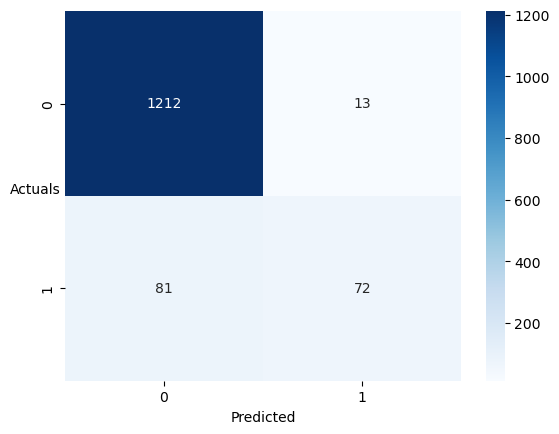

In [538]:
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

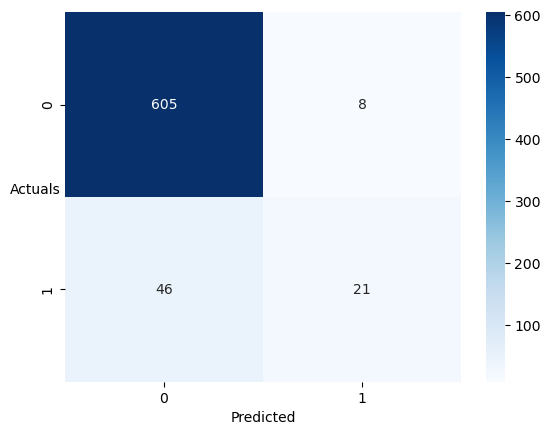

In [539]:
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [540]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1225
           1       0.85      0.47      0.61       153

    accuracy                           0.93      1378
   macro avg       0.89      0.73      0.78      1378
weighted avg       0.93      0.93      0.92      1378



In [541]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       613
           1       0.72      0.31      0.44        67

    accuracy                           0.92       680
   macro avg       0.83      0.65      0.70       680
weighted avg       0.91      0.92      0.91       680



AUC ROC score on training data: 0.7299879951980792


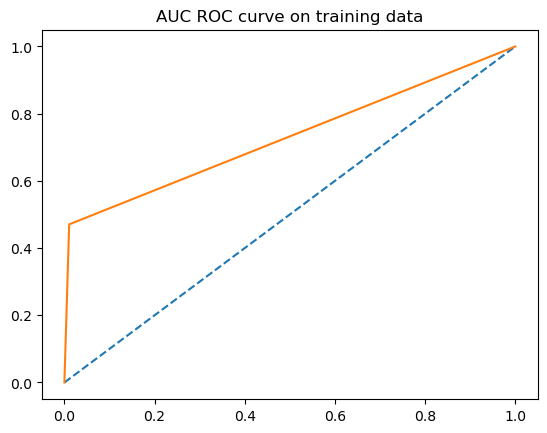

In [542]:
#AUC score
#ROC curve on training data
#ROC_AUC score on training data

#y_train_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(Default_train['Default'], pred_train_rf)
print('AUC ROC score on training data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on training data")
fpr, tpr , _ = metrics.roc_curve(Default_train['Default'], pred_train_rf)

# plot the roc curve for the model
plt.plot(fpr,tpr);

AUC ROC score on test data: 0.650191132429208


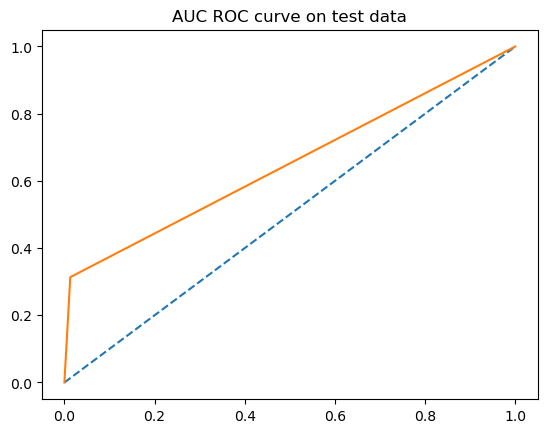

In [543]:
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(Default_test['Default'], pred_test_rf)
print('AUC ROC score on test data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on test data")
fpr, tpr , _ = metrics.roc_curve(Default_test['Default'], pred_test_rf)

# plot the roc curve for the model
plt.plot(fpr,tpr);

In [509]:
# Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()

lda_model = LDA.fit(X_train, y_train)

In [510]:
lda_model.coef_

array([[ 0.5797559 ,  0.24854823,  1.26895049, -0.26042433, -0.12009656,
         0.58589859, -1.15990773, -0.39523498]])

In [511]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

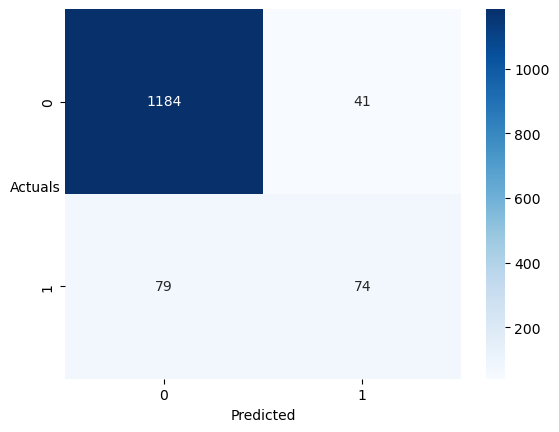

In [512]:
sns.heatmap((metrics.confusion_matrix(Default_train['Default'],pred_train_lda)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

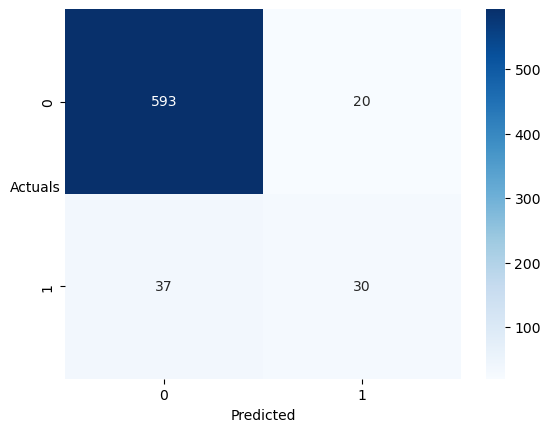

In [513]:
sns.heatmap((metrics.confusion_matrix(Default_test['Default'],pred_test_lda)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [514]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1225
           1       0.64      0.48      0.55       153

    accuracy                           0.91      1378
   macro avg       0.79      0.73      0.75      1378
weighted avg       0.90      0.91      0.91      1378



In [515]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       613
           1       0.60      0.45      0.51        67

    accuracy                           0.92       680
   macro avg       0.77      0.71      0.73       680
weighted avg       0.91      0.92      0.91       680



In [516]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [517]:
#choosing optimal threshold
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['Default'],pred_train_lda_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.08243350607494335

In [518]:
y_train_pred=[]
for i in range(0,len(pred_train_lda)):
    if np.array(pred_train_lda)[i]>0.08:
        a=1
    else:
        a=0
    y_train_pred.append(a)

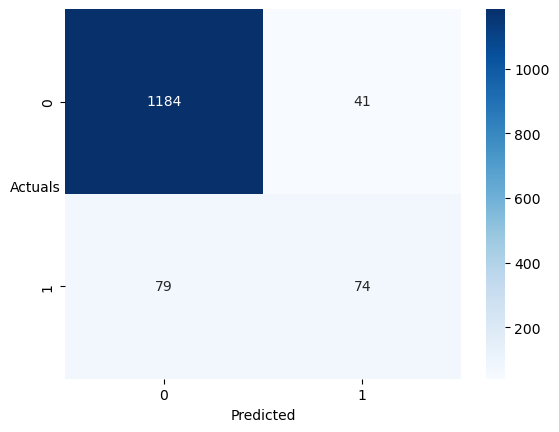

In [519]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [520]:
print(metrics.classification_report(y_train, y_train_pred,digits=3))

              precision    recall  f1-score   support

           0      0.937     0.967     0.952      1225
           1      0.643     0.484     0.552       153

    accuracy                          0.913      1378
   macro avg      0.790     0.725     0.752      1378
weighted avg      0.905     0.913     0.907      1378



In [521]:
y_test_pred=[]
for i in range(0,len(pred_test_lda)):
    if np.array(pred_test_lda)[i]>0.08:
        a=1
    else:
        a=0
    y_test_pred.append(a)

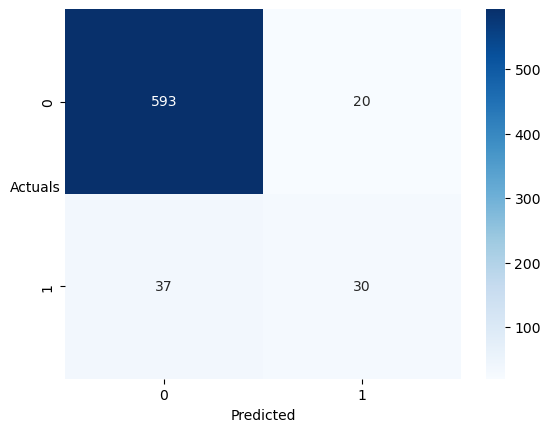

In [522]:
sns.heatmap((metrics.confusion_matrix(y_test, y_test_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [523]:
print(metrics.classification_report(y_test, y_test_pred,digits=3))

              precision    recall  f1-score   support

           0      0.941     0.967     0.954       613
           1      0.600     0.448     0.513        67

    accuracy                          0.916       680
   macro avg      0.771     0.708     0.733       680
weighted avg      0.908     0.916     0.911       680



AUC ROC score on training data: 0.9103961584633853


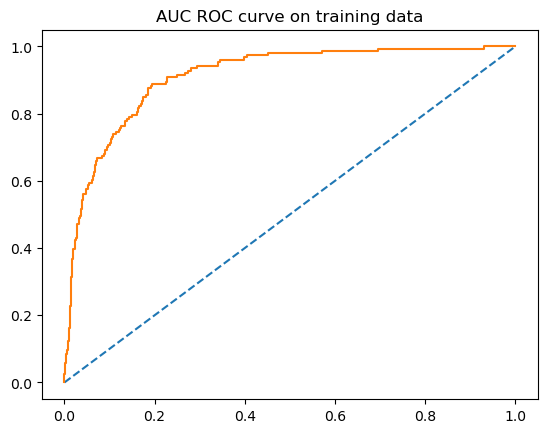

In [524]:
#AUC score
#ROC curve on training data
#ROC_AUC score on training data

#y_train_predicted_prob - predicted probabilities for training data
# keep probabilities for the positive outcome only
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(Default_train['Default'], pred_train_lda_prob)
print('AUC ROC score on training data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on training data")
fpr, tpr , _ = metrics.roc_curve(Default_train['Default'], pred_train_lda_prob)

# plot the roc curve for the model
plt.plot(fpr,tpr);

AUC ROC score on test data: 0.9048233546784836


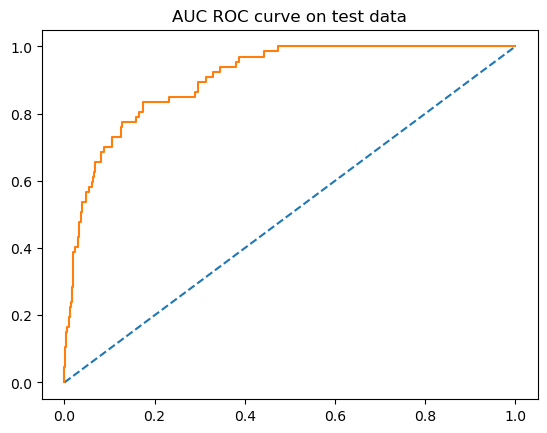

In [525]:
plt.plot([0, 1], [0, 1], linestyle='--')
# calculate AUC
auc = metrics.roc_auc_score(Default_test['Default'], pred_test_lda_prob)
print('AUC ROC score on test data:', auc)
# calculate roc curve
plt.title("AUC ROC curve on test data")
fpr, tpr , _ = metrics.roc_curve(Default_test['Default'], pred_test_lda_prob)

# plot the roc curve for the model
plt.plot(fpr,tpr);